In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Conv2DTranspose, Conv2D, MaxPooling2D, Input, UpSampling2D, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Organize the dataset

In [2]:
train_mild='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/train/MildDemented/'
train_moderate='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/train/ModerateDemented/'
train_non='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/train/NonDemented/'
train_very_mild='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/train/VeryMildDemented/'

test_mild='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/test/MildDemented/'
test_moderate='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/test/ModerateDemented/'
test_non='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/test/NonDemented/'
test_very_mild='C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/test/VeryMildDemented/'

In [3]:
mild_train = []
for filename in os.listdir(train_mild):
    img = image.load_img(train_mild + filename, target_size=(96, 96))
    mild_train.append(image.img_to_array(img))
mild_train = np.array(mild_train)

In [4]:
moderate_train = []
for filename in os.listdir(train_moderate):
    img = image.load_img(train_moderate + filename, target_size=(96, 96))
    moderate_train.append(image.img_to_array(img))
moderate_train = np.array(moderate_train)

In [5]:
non_train = []
for filename in os.listdir(train_non):
    img = image.load_img(train_non + filename, target_size=(96, 96))
    non_train.append(image.img_to_array(img))
non_train = np.array(non_train)

In [6]:
very_mild_train = []
for filename in os.listdir(train_very_mild):
    img = image.load_img(train_very_mild + filename, target_size=(96, 96))
    very_mild_train.append(image.img_to_array(img))
very_mild_train = np.array(very_mild_train)

In [7]:
x_train = np.concatenate((mild_train,moderate_train,non_train,very_mild_train),axis=0)

In [8]:
def show_data(X, n=5, title=""):
    plt.figure(figsize=(20, 20))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
    plt.suptitle(title, fontsize = 20)

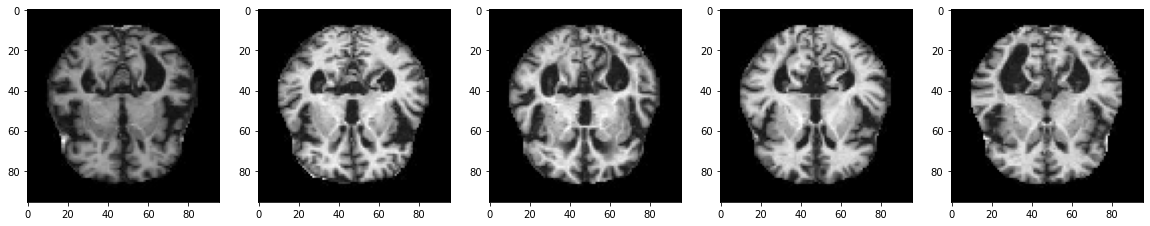

In [9]:
show_data(x_train)

In [10]:
mild_test = []
for filename in os.listdir(test_mild):
    img = image.load_img(test_mild + filename, target_size=(96, 96))
    mild_test.append(image.img_to_array(img))
mild_test= np.array(mild_test)

In [11]:
moderate_test = []
for filename in os.listdir(test_moderate):
    img = image.load_img(test_moderate + filename, target_size=(96, 96))
    moderate_test.append(image.img_to_array(img))
moderate_test = np.array(moderate_test)

In [12]:
non_test = []
for filename in os.listdir(test_non):
    img = image.load_img(test_non + filename, target_size=(96, 96))
    non_test.append(image.img_to_array(img))
non_test = np.array(non_test)

In [13]:
very_mild_test = []
for filename in os.listdir(test_very_mild):
    img = image.load_img(test_very_mild + filename, target_size=(96, 96))
    very_mild_test.append(image.img_to_array(img))
very_mild_test = np.array(very_mild_test)

In [14]:
x_test = np.concatenate((mild_test,moderate_test,non_test,very_mild_test),axis=0)

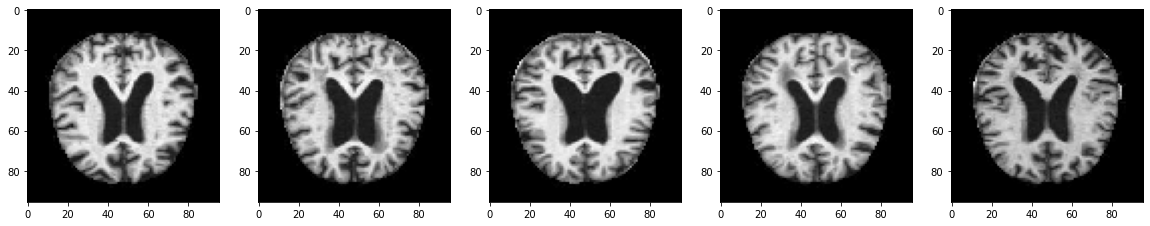

In [15]:
show_data(x_test)

## Implementing Autoencoder

In [16]:
input_layer = Input(shape=(96, 96, 3), name="INPUT")
x = Conv2D(12, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(6, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(3, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(6, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [17]:
autoencoder = Model(input_layer, output_layer)

In [18]:
autoencoder.compile(optimizer =RMSprop(learning_rate = 0.001), loss = 'mean_squared_error', metrics = ['accuracy'])

In [19]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 12)        336       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 6)         654       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 3)         165       
_________________________________________________________________
CODE (MaxPooling2D)          (None, 12, 12, 3)         0     

In [20]:
autoencoder.fit(x_train, x_train, batch_size = 64, validation_data = (x_test, x_test), epochs = 50, verbose = 2)  #train autoencoder

Epoch 1/50
81/81 - 13s - loss: 3519.3721 - accuracy: 0.2263 - val_loss: 1542.3917 - val_accuracy: 0.2965
Epoch 2/50
81/81 - 3s - loss: 1694.4764 - accuracy: 0.3063 - val_loss: 1416.2561 - val_accuracy: 0.3282
Epoch 3/50
81/81 - 3s - loss: 1552.8752 - accuracy: 0.3150 - val_loss: 1868.3872 - val_accuracy: 0.3522
Epoch 4/50
81/81 - 3s - loss: 1470.4573 - accuracy: 0.3167 - val_loss: 1366.0883 - val_accuracy: 0.3201
Epoch 5/50
81/81 - 3s - loss: 1404.8226 - accuracy: 0.3181 - val_loss: 1712.2009 - val_accuracy: 0.3172
Epoch 6/50
81/81 - 3s - loss: 1356.7218 - accuracy: 0.3207 - val_loss: 1246.6953 - val_accuracy: 0.3320
Epoch 7/50
81/81 - 3s - loss: 1312.5632 - accuracy: 0.3266 - val_loss: 1483.4194 - val_accuracy: 0.3236
Epoch 8/50
81/81 - 3s - loss: 1271.9354 - accuracy: 0.3348 - val_loss: 1556.9982 - val_accuracy: 0.3772
Epoch 9/50
81/81 - 3s - loss: 1245.6129 - accuracy: 0.3427 - val_loss: 1275.2107 - val_accuracy: 0.3772
Epoch 10/50
81/81 - 3s - loss: 1222.5983 - accuracy: 0.3482 - v

In [21]:
encoder = Model(autoencoder.input, autoencoder.get_layer("CODE").output)   

In [22]:
encoder_output = encoder.predict(x_test)

In [23]:
def show_encoded_data(X, n=5, height=18, width=24, title=""):
    plt.figure(figsize=(20, 20))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

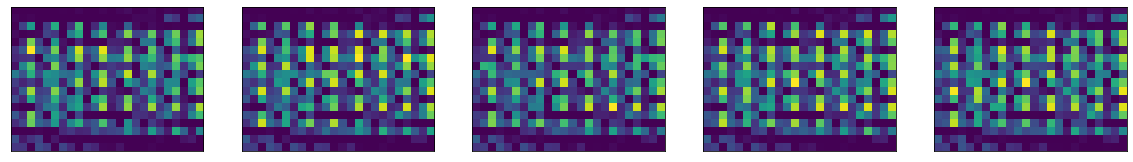

In [24]:
show_encoded_data(encoder_output, height= 18, width= 24)   #encoder output

In [25]:
encoder_output.shape

(1279, 12, 12, 3)

In [26]:
#save the encoder data 

pd.DataFrame(encoder_output.reshape(1279*12, 12*3)).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/encoder_output.csv', index = False)

# Implement Sampling Techniques for Imbalance Data

In [27]:
imbalance = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/encoder_output.csv')

In [28]:
encoded_data = imbalance.values
imbalance_x, imbalance_y = encoded_data[:, :-1], encoded_data[:, -1]
x_train_1, y_train_1 = encoded_data[:, :-1], encoded_data[:, -1]

In [29]:
x_train_1 = x_train_1.astype('int')
y_train_1 = y_train_1.astype('int')

In [30]:
from sklearn.datasets import make_classification
x_train_1, y_train_1 = make_classification(n_samples= 1000, flip_y = 0, n_features = 35) 

## Implementing SMOTE (random oversampling)

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [32]:
x_resample_1, y_resample_1 = smote.fit_resample(x_train_1, y_train_1)

In [33]:
pd.DataFrame(x_resample_1).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_1.csv', index = False)

In [34]:
pd.DataFrame(y_resample_1).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_1.csv', index = False)

## Implementing ADASYN (random oversampling)

In [35]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority')

In [36]:
x_resample_2, y_resample_2 = adasyn.fit_resample(x_train_1, y_train_1)

In [37]:
pd.DataFrame(x_resample_2).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_2.csv', index = False)

In [38]:
pd.DataFrame(y_resample_2).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_2.csv', index = False)

## Implementing Boderline SMOTE (oversampling)

In [39]:
from imblearn.over_sampling import BorderlineSMOTE
boderline_smote = BorderlineSMOTE(sampling_strategy='minority')

In [40]:
x_resample_3, y_resample_3 = boderline_smote.fit_resample(x_train_1, y_train_1)

In [41]:
pd.DataFrame(x_resample_3).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_3.csv', index = False)

In [42]:
pd.DataFrame(y_resample_3).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_3.csv', index = False)

## Implementing SVM-SMOTE (oversampling)

In [43]:
from imblearn.over_sampling import SVMSMOTE 
svm_smote = SVMSMOTE(sampling_strategy='minority')

In [44]:
x_resample_4, y_resample_4 = svm_smote.fit_resample(x_train_1, y_train_1)

In [45]:
pd.DataFrame(x_resample_4).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_4.csv', index = False)

In [46]:
pd.DataFrame(y_resample_4).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_4.csv', index = False)

## Implementing Cluster Centroid (undersampling)

In [47]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(sampling_strategy='majority')

In [48]:
x_resample_5, y_resample_5 = cc.fit_resample(x_train_1, y_train_1)

In [49]:
pd.DataFrame(x_resample_5).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_5.csv', index = False)

In [50]:
pd.DataFrame(y_resample_5).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_5.csv', index = False)

## Implementing TomekLinks (undersampling)

In [51]:
from imblearn.under_sampling import TomekLinks 
tl = TomekLinks(sampling_strategy='majority')

In [52]:
x_resample_6, y_resample_6 = tl.fit_resample(x_train_1, y_train_1)

In [53]:
pd.DataFrame(x_resample_6).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_6.csv', index = False)

In [54]:
pd.DataFrame(y_resample_6).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_6.csv', index = False)

## Implementing Edited Nearest Neighbour (undersampling)

In [55]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')

In [56]:
x_resample_7, y_resample_7 = enn.fit_resample(x_train_1, y_train_1)

In [57]:
pd.DataFrame(x_resample_7).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_7.csv', index = False)

In [58]:
pd.DataFrame(y_resample_7).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_7.csv', index = False)

## Implementing NeighbourhoodCleaningRule (undersampling)

In [59]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(sampling_strategy='majority')

In [60]:
x_resample_8, y_resample_8 = ncr.fit_resample(x_train_1, y_train_1)

In [61]:
pd.DataFrame(x_resample_8).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_8.csv', index = False)

In [62]:
pd.DataFrame(y_resample_8).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_8.csv', index = False)

## Implementing AllKNN (undersampling)

In [63]:
from imblearn.under_sampling import AllKNN
all_knn = AllKNN(sampling_strategy='majority')

In [64]:
x_resample_9, y_resample_9 = all_knn.fit_resample(x_train_1, y_train_1)

In [65]:
pd.DataFrame(x_resample_9).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_9.csv', index = False)

In [66]:
pd.DataFrame(y_resample_9).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_9.csv', index = False)

## Implementing SMOTE ENN (combination of over & undersampling)

In [67]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy='auto')

In [68]:
x_resample_10, y_resample_10 = smote_enn.fit_resample(x_train_1, y_train_1)

In [69]:
pd.DataFrame(x_resample_10).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_10.csv', index = False)

In [70]:
pd.DataFrame(y_resample_10).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_10.csv', index = False)

## Implementing SMOTE Tomek (combination of over & undersampling)

In [71]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto')

In [72]:
x_resample_11, y_resample_11 = smote_tomek.fit_resample(x_train_1, y_train_1)

In [73]:
pd.DataFrame(x_resample_11).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/x_resample_11.csv', index = False)

In [74]:
pd.DataFrame(y_resample_11).to_csv('C://Users/Soumyajit/Downloads/datasets/brain_mri_dataset/y_resample_11.csv', index = False)

# KNN

## Implement KNN Classifier with Imbalance Data 

In [75]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(imbalance_x, imbalance_y, test_size = 0.2)

In [76]:
y_train_2 = y_train_2.astype('int')
y_test_2 = y_test_2.astype('int')

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=10)

In [78]:
knn_1.fit(x_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=10)

In [79]:
knn_1.score(x_test_2, y_test_2)

0.5895765472312704

In [80]:
from sklearn.model_selection import cross_val_score
knn_cv_1 = KNeighborsClassifier(n_neighbors=10)

In [81]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [82]:
cv_scores_1 = cross_val_score(knn_cv_1, x_train_2, y_train_2, cv=cv)

In [83]:
print("Accuracy: %f" %np.mean(cv_scores_1))

Accuracy: 0.580878


In [84]:
from sklearn.metrics import precision_score
knn_y_pred_1 = knn_1.predict(x_test_2)
knn_precision_1 = precision_score(y_test_2, knn_y_pred_1, average = 'weighted')

In [85]:
print("Precision: %f" %knn_precision_1)

Precision: 0.583912


In [86]:
from sklearn.metrics import recall_score
knn_recall_1 = recall_score(y_test_2, knn_y_pred_1, average = 'weighted')

In [87]:
print("Recall: %f" %knn_recall_1)

Recall: 0.589577


In [88]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_2, knn_y_pred_1, pos_label=2)
knn_auc_1 = auc(fpr_1, tpr_1)

In [89]:
print("AUC: %f" %knn_auc_1)

AUC: 0.485353


## Implement KNN Classifier with Balanced (SMOTE) Data

In [90]:
balance_x_1 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_1.csv')
balance_y_1 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_1.csv')

In [91]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(balance_x_1, balance_y_1, test_size = 0.2)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn_2 = KNeighborsClassifier(n_neighbors=10)

In [93]:
x_train_3 = np.array(x_train_3)
x_test_3 = np.array(x_test_3)

In [94]:
y_train_3 = np.array(y_train_3)
y_test_3 = np.array(y_test_3)

In [95]:
y_train_3 = y_train_3.ravel()
y_test_3 = y_test_3.ravel()

In [96]:
knn_2.fit(x_train_3, y_train_3)

KNeighborsClassifier(n_neighbors=10)

In [97]:
knn_2.score(x_test_3, y_test_3)

0.86

In [98]:
from sklearn.model_selection import cross_val_score
knn_cv_2 = KNeighborsClassifier(n_neighbors=10)

In [99]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [100]:
cv_scores_2 = cross_val_score(knn_cv_2, x_train_3, y_train_3, cv=cv)

In [101]:
print("Accuracy: %f" %np.mean(cv_scores_2))   

Accuracy: 0.895000


In [102]:
from sklearn.metrics import precision_score
knn_y_pred_2 = knn_2.predict(x_test_3)
knn_precision_2 = precision_score(y_test_3, knn_y_pred_2)

In [103]:
print("Precision: %f" %knn_precision_2)

Precision: 0.944000


In [104]:
from sklearn.metrics import recall_score
knn_recall_2 = recall_score(y_test_3, knn_y_pred_2)

In [105]:
print("Recall: %f" %knn_recall_2)

Recall: 0.771242


In [106]:
from sklearn.metrics import roc_auc_score
knn_auc_2 = roc_auc_score(y_test_3, knn_y_pred_2)

In [107]:
print("AUC: %f" %knn_auc_2)

AUC: 0.861811


## Implement KNN Classifier with Balanced (ADASYN) Data

In [108]:
balance_x_2 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_2.csv')
balance_y_2 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_2.csv')

In [109]:
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(balance_x_2, balance_y_2, test_size = 0.2)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=10)

In [111]:
x_train_4 = np.array(x_train_4)
x_test_4 = np.array(x_test_4)

In [112]:
y_train_4 = np.array(y_train_4)
y_test_4 = np.array(y_test_4)

In [113]:
y_train_4 = y_train_4.ravel()
y_test_4 = y_test_4.ravel()

In [114]:
knn_3.fit(x_train_4, y_train_4)

KNeighborsClassifier(n_neighbors=10)

In [115]:
knn_3.score(x_test_4, y_test_4)

0.8866666666666667

In [116]:
from sklearn.model_selection import cross_val_score
knn_cv_3 = KNeighborsClassifier(n_neighbors=10)

In [117]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [118]:
cv_scores_3 = cross_val_score(knn_cv_3, x_train_4, y_train_4, cv=cv)

In [119]:
print("Accuracy: %f" %np.mean(cv_scores_3))   

Accuracy: 0.892500


In [120]:
from sklearn.metrics import precision_score
knn_y_pred_3 = knn_3.predict(x_test_4)
knn_precision_3 = precision_score(y_test_4, knn_y_pred_3)

In [121]:
print("Precision: %f" %knn_precision_3)

Precision: 0.933333


In [122]:
from sklearn.metrics import recall_score
knn_recall_3 = recall_score(y_test_4, knn_y_pred_3)

In [123]:
print("Recall: %f" %knn_recall_3)

Recall: 0.834437


In [124]:
from sklearn.metrics import roc_auc_score
knn_auc_3 = roc_auc_score(y_test_4, knn_y_pred_3)

In [125]:
print("AUC: %f" %knn_auc_3)

AUC: 0.887017


## Implement KNN Classifier with Balanced (Boderline SMOTE) Data

In [126]:
balance_x_3 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_3.csv')
balance_y_3 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_3.csv')

In [127]:
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(balance_x_3, balance_y_3, test_size = 0.2)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn_4 = KNeighborsClassifier(n_neighbors=10)

In [129]:
x_train_5 = np.array(x_train_5)
x_test_5 = np.array(x_test_5)

In [130]:
y_train_5 = np.array(y_train_5)
y_test_5 = np.array(y_test_5)

In [131]:
y_train_5 = y_train_5.ravel()
y_test_5 = y_test_5.ravel()

In [132]:
knn_4.fit(x_train_5, y_train_5)

KNeighborsClassifier(n_neighbors=10)

In [133]:
knn_4.score(x_test_5, y_test_5)

0.8833333333333333

In [134]:
from sklearn.model_selection import cross_val_score
knn_cv_4 = KNeighborsClassifier(n_neighbors=10)

In [135]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [136]:
cv_scores_4 = cross_val_score(knn_cv_4, x_train_5, y_train_5, cv=cv)

In [137]:
print("Accuracy: %f" %np.mean(cv_scores_4))   

Accuracy: 0.885000


In [138]:
from sklearn.metrics import precision_score
knn_y_pred_4 = knn_4.predict(x_test_5)
knn_precision_4 = precision_score(y_test_5, knn_y_pred_4)

In [139]:
print("Precision: %f" %knn_precision_4)

Precision: 0.909836


In [140]:
from sklearn.metrics import recall_score
knn_recall_4 = recall_score(y_test_5, knn_y_pred_4)

In [141]:
print("Recall: %f" %knn_recall_4)

Recall: 0.822222


In [142]:
from sklearn.metrics import roc_auc_score
knn_auc_4 = roc_auc_score(y_test_5, knn_y_pred_4)

In [143]:
print("AUC: %f" %knn_auc_4)

AUC: 0.877778


## Implement KNN Classifier with Balanced (SVM-SMOTE) Data

In [144]:
balance_x_4 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_4.csv')
balance_y_4 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_4.csv')

In [145]:
x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(balance_x_4, balance_y_4, test_size = 0.2)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn_5 = KNeighborsClassifier(n_neighbors=10)

In [147]:
x_train_6 = np.array(x_train_6)
x_test_6 = np.array(x_test_6)

In [148]:
y_train_6 = np.array(y_train_6)
y_test_6 = np.array(y_test_6)

In [149]:
y_train_6 = y_train_6.ravel()
y_test_6 = y_test_6.ravel()

In [150]:
knn_5.fit(x_train_6, y_train_6)

KNeighborsClassifier(n_neighbors=10)

In [151]:
knn_5.score(x_test_6, y_test_6)

0.92

In [152]:
from sklearn.model_selection import cross_val_score
knn_cv_5 = KNeighborsClassifier(n_neighbors=10)

In [153]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [154]:
cv_scores_5 = cross_val_score(knn_cv_5, x_train_6, y_train_6, cv=cv)

In [155]:
print("Accuracy: %f" %np.mean(cv_scores_5))   

Accuracy: 0.877500


In [156]:
from sklearn.metrics import precision_score
knn_y_pred_5 = knn_5.predict(x_test_6)
knn_precision_5 = precision_score(y_test_6, knn_y_pred_5)

In [157]:
print("Precision: %f" %knn_precision_5)

Precision: 0.964539


In [158]:
from sklearn.metrics import recall_score
knn_recall_5 = recall_score(y_test_6, knn_y_pred_5)

In [159]:
print("Recall: %f" %knn_recall_5)

Recall: 0.877419


In [160]:
from sklearn.metrics import roc_auc_score
knn_auc_5 = roc_auc_score(y_test_6, knn_y_pred_5)

In [161]:
print("AUC: %f" %knn_auc_5)

AUC: 0.921468


## Implement KNN Classifier with Balanced (Cluster Centroid) Data

In [162]:
balance_x_5 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_5.csv')
balance_y_5 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_5.csv')

In [163]:
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(balance_x_5, balance_y_5, test_size = 0.2)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn_6 = KNeighborsClassifier(n_neighbors=10)

In [165]:
x_train_7 = np.array(x_train_7)
x_test_7 = np.array(x_test_7)

In [166]:
y_train_7 = np.array(y_train_7)
y_test_7 = np.array(y_test_7)

In [167]:
y_train_7 = y_train_7.ravel()
y_test_7 = y_test_7.ravel()

In [168]:
knn_6.fit(x_train_7, y_train_7)

KNeighborsClassifier(n_neighbors=10)

In [169]:
knn_6.score(x_test_7, y_test_7)

0.8833333333333333

In [170]:
from sklearn.model_selection import cross_val_score
knn_cv_6 = KNeighborsClassifier(n_neighbors=10)

In [171]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [172]:
cv_scores_6 = cross_val_score(knn_cv_6, x_train_7, y_train_7, cv=cv)

In [173]:
print("Accuracy: %f" %np.mean(cv_scores_6))   

Accuracy: 0.889167


In [174]:
from sklearn.metrics import precision_score
knn_y_pred_6 = knn_6.predict(x_test_7)
knn_precision_6 = precision_score(y_test_7, knn_y_pred_6)

In [175]:
print("Precision: %f" %knn_precision_6)

Precision: 0.938462


In [176]:
from sklearn.metrics import recall_score
knn_recall_6 = recall_score(y_test_7, knn_y_pred_6)

In [177]:
print("Recall: %f" %knn_recall_6)

Recall: 0.818792


In [178]:
from sklearn.metrics import roc_auc_score
knn_auc_6 = roc_auc_score(y_test_7, knn_y_pred_6)

In [179]:
print("AUC: %f" %knn_auc_6)

AUC: 0.882906


## Implement KNN Classifier with Balanced (TomekLinks) Data

In [180]:
balance_x_6 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_6.csv')
balance_y_6 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_6.csv')

In [181]:
x_train_8, x_test_8, y_train_8, y_test_8 = train_test_split(balance_x_6, balance_y_6, test_size = 0.2)

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn_7 = KNeighborsClassifier(n_neighbors=10)

In [183]:
x_train_8 = np.array(x_train_8)
x_test_8 = np.array(x_test_8)

In [184]:
y_train_8 = np.array(y_train_8)
y_test_8 = np.array(y_test_8)

In [185]:
y_train_8 = y_train_8.ravel()
y_test_8 = y_test_8.ravel()

In [186]:
knn_7.fit(x_train_8, y_train_8)

KNeighborsClassifier(n_neighbors=10)

In [187]:
knn_7.score(x_test_8, y_test_8)

0.8527397260273972

In [188]:
from sklearn.model_selection import cross_val_score
knn_cv_7 = KNeighborsClassifier(n_neighbors=10)

In [189]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [190]:
cv_scores_7 = cross_val_score(knn_cv_7, x_train_8, y_train_8, cv=cv)

In [191]:
print("Accuracy: %f" %np.mean(cv_scores_7))   

Accuracy: 0.896257


In [192]:
from sklearn.metrics import precision_score
knn_y_pred_7 = knn_7.predict(x_test_8)
knn_precision_7 = precision_score(y_test_8, knn_y_pred_7)

In [193]:
print("Precision: %f" %knn_precision_7)

Precision: 0.933824


In [194]:
from sklearn.metrics import recall_score
knn_recall_7 = recall_score(y_test_8, knn_y_pred_7)

In [195]:
print("Recall: %f" %knn_recall_7)

Recall: 0.788820


In [196]:
from sklearn.metrics import roc_auc_score
knn_auc_7 = roc_auc_score(y_test_8, knn_y_pred_7)

In [197]:
print("AUC: %f" %knn_auc_7)

AUC: 0.860059


## Implement KNN Classifier with Balanced (Edited Nearest Neighbour) Data

In [198]:
balance_x_7 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_7.csv')
balance_y_7 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_7.csv')

In [199]:
x_train_9, x_test_9, y_train_9, y_test_9 = train_test_split(balance_x_7, balance_y_7, test_size = 0.2)

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn_8 = KNeighborsClassifier(n_neighbors=10)

In [201]:
x_train_9 = np.array(x_train_9)
x_test_9 = np.array(x_test_9)

In [202]:
y_train_9 = np.array(y_train_9)
y_test_9 = np.array(y_test_9)

In [203]:
y_train_9 = y_train_9.ravel()
y_test_9 = y_test_9.ravel()

In [204]:
knn_8.fit(x_train_9, y_train_9)

KNeighborsClassifier(n_neighbors=10)

In [205]:
knn_8.score(x_test_9, y_test_9)

0.9300411522633745

In [206]:
from sklearn.model_selection import cross_val_score
knn_cv_8 = KNeighborsClassifier(n_neighbors=10)

In [207]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [208]:
cv_scores_8 = cross_val_score(knn_cv_8, x_train_9, y_train_9, cv=cv)

In [209]:
print("Accuracy: %f" %np.mean(cv_scores_8))   

Accuracy: 0.928823


In [210]:
from sklearn.metrics import precision_score
knn_y_pred_8 = knn_8.predict(x_test_9)
knn_precision_8 = precision_score(y_test_9, knn_y_pred_8)

In [211]:
print("Precision: %f" %knn_precision_8)

Precision: 0.984848


In [212]:
from sklearn.metrics import recall_score
knn_recall_8 = recall_score(y_test_9, knn_y_pred_8)

In [213]:
print("Recall: %f" %knn_recall_8)

Recall: 0.896552


In [214]:
from sklearn.metrics import roc_auc_score
knn_auc_8 = roc_auc_score(y_test_9, knn_y_pred_8)

In [215]:
print("AUC: %f" %knn_auc_8)

AUC: 0.938072


## Implement KNN Classifier with Balanced (NeighbourhoodCleaningRule) Data

In [216]:
balance_x_8 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_8.csv')
balance_y_8 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_8.csv')

In [217]:
x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(balance_x_8, balance_y_8, test_size = 0.2)

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn_9 = KNeighborsClassifier(n_neighbors=10)

In [219]:
x_train_10 = np.array(x_train_10)
x_test_10 = np.array(x_test_10)

In [220]:
y_train_10 = np.array(y_train_10)
y_test_10 = np.array(y_test_10)

In [221]:
y_train_10 = y_train_10.ravel()
y_test_10 = y_test_10.ravel()

In [222]:
knn_9.fit(x_train_10, y_train_10)

KNeighborsClassifier(n_neighbors=10)

In [223]:
knn_9.score(x_test_10, y_test_10)

0.9145907473309609

In [224]:
from sklearn.model_selection import cross_val_score
knn_cv_9 = KNeighborsClassifier(n_neighbors=10)

In [225]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [226]:
cv_scores_9 = cross_val_score(knn_cv_9, x_train_10, y_train_10, cv=cv)

In [227]:
print("Accuracy: %f" %np.mean(cv_scores_9))   

Accuracy: 0.915179


In [228]:
from sklearn.metrics import precision_score
knn_y_pred_9 = knn_9.predict(x_test_10)
knn_precision_9 = precision_score(y_test_10, knn_y_pred_9)

In [229]:
print("Precision: %f" %knn_precision_9)

Precision: 0.978102


In [230]:
from sklearn.metrics import recall_score
knn_recall_9 = recall_score(y_test_10, knn_y_pred_9)

In [231]:
print("Recall: %f" %knn_recall_9)

Recall: 0.864516


In [232]:
from sklearn.metrics import roc_auc_score
knn_auc_9 = roc_auc_score(y_test_10, knn_y_pred_9)

In [233]:
print("AUC: %f" %knn_auc_9)

AUC: 0.920353


## Implement KNN Classifier with Balanced (AllKNN) Data

In [234]:
balance_x_9 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_9.csv')
balance_y_9 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_9.csv')

In [235]:
x_train_11, x_test_11, y_train_11, y_test_11 = train_test_split(balance_x_9, balance_y_9, test_size = 0.2)

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)

In [237]:
x_train_11 = np.array(x_train_11)
x_test_11 = np.array(x_test_11)

In [238]:
y_train_11 = np.array(y_train_11)
y_test_11 = np.array(y_test_11)

In [239]:
y_train_11 = y_train_11.ravel()
y_test_11 = y_test_11.ravel()

In [240]:
knn_10.fit(x_train_11, y_train_11)

KNeighborsClassifier(n_neighbors=10)

In [241]:
knn_10.score(x_test_11, y_test_11)

0.9021739130434783

In [242]:
from sklearn.model_selection import cross_val_score
knn_cv_10 = KNeighborsClassifier(n_neighbors=10)

In [243]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [244]:
cv_scores_10 = cross_val_score(knn_cv_10, x_train_11, y_train_11, cv=cv)

In [245]:
print("Accuracy: %f" %np.mean(cv_scores_10))   

Accuracy: 0.900197


In [246]:
from sklearn.metrics import precision_score
knn_y_pred_10 = knn_10.predict(x_test_11)
knn_precision_10 = precision_score(y_test_11, knn_y_pred_10)

In [247]:
print("Precision: %f" %knn_precision_10)

Precision: 0.964286


In [248]:
from sklearn.metrics import recall_score
knn_recall_10 = recall_score(y_test_11, knn_y_pred_10)

In [249]:
print("Recall: %f" %knn_recall_10)

Recall: 0.859873


In [250]:
from sklearn.metrics import roc_auc_score
knn_auc_10 = roc_auc_score(y_test_11, knn_y_pred_10)

In [251]:
print("AUC: %f" %knn_auc_10)

AUC: 0.908928


## Implement KNN Classifier with Balanced (SMOTE ENN) Data

In [252]:
balance_x_10 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_10.csv')
balance_y_10 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_10.csv')

In [253]:
x_train_12, x_test_12, y_train_12, y_test_12 = train_test_split(balance_x_10, balance_y_10, test_size = 0.2)

In [254]:
from sklearn.neighbors import KNeighborsClassifier
knn_11 = KNeighborsClassifier(n_neighbors=10)

In [255]:
x_train_12 = np.array(x_train_12)
x_test_12 = np.array(x_test_12)

In [256]:
y_train_12 = np.array(y_train_12)
y_test_12 = np.array(y_test_12)

In [257]:
y_train_12 = y_train_12.ravel()
y_test_12 = y_test_12.ravel()

In [258]:
knn_11.fit(x_train_12, y_train_12)

KNeighborsClassifier(n_neighbors=10)

In [259]:
knn_11.score(x_test_12, y_test_12)

0.9894736842105263

In [260]:
from sklearn.model_selection import cross_val_score
knn_cv_11 = KNeighborsClassifier(n_neighbors=10)

In [261]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [262]:
cv_scores_11 = cross_val_score(knn_cv_11, x_train_12, y_train_12, cv=cv)

In [263]:
print("Accuracy: %f" %np.mean(cv_scores_11))   

Accuracy: 0.985491


In [264]:
from sklearn.metrics import precision_score
knn_y_pred_11 = knn_11.predict(x_test_12)
knn_precision_11 = precision_score(y_test_12, knn_y_pred_11)

In [265]:
print("Precision: %f" %knn_precision_11)

Precision: 1.000000


In [266]:
from sklearn.metrics import recall_score
knn_recall_11 = recall_score(y_test_12, knn_y_pred_11)

In [267]:
print("Recall: %f" %knn_recall_11)

Recall: 0.981132


In [268]:
from sklearn.metrics import roc_auc_score
knn_auc_11 = roc_auc_score(y_test_12, knn_y_pred_11)

In [269]:
print("AUC: %f" %knn_auc_11)

AUC: 0.990566


## Implement KNN Classifier with Balanced (SMOTE Tomek) Data

In [270]:
balance_x_11 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/x_resample_11.csv')
balance_y_11 = pd.read_csv('C://Users/Soumyajit/Downloads/datasets/Covid19-dataset/y_resample_11.csv')

In [271]:
x_train_13, x_test_13, y_train_13, y_test_13 = train_test_split(balance_x_11, balance_y_11, test_size = 0.2)

In [272]:
from sklearn.neighbors import KNeighborsClassifier
knn_12 = KNeighborsClassifier(n_neighbors=10)

In [273]:
x_train_13 = np.array(x_train_13)
x_test_13 = np.array(x_test_13)

In [274]:
y_train_13 = np.array(y_train_13)
y_test_13 = np.array(y_test_13)

In [275]:
y_train_13 = y_train_13.ravel()
y_test_13 = y_test_13.ravel()

In [276]:
knn_12.fit(x_train_13, y_train_13)

KNeighborsClassifier(n_neighbors=10)

In [277]:
knn_12.score(x_test_13, y_test_13)

0.9225352112676056

In [278]:
from sklearn.model_selection import cross_val_score
knn_cv_12 = KNeighborsClassifier(n_neighbors=10)

In [279]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [280]:
cv_scores_12 = cross_val_score(knn_cv_12, x_train_13, y_train_13, cv=cv)

In [281]:
print("Accuracy: %f" %np.mean(cv_scores_12))   

Accuracy: 0.910061


In [282]:
from sklearn.metrics import precision_score
knn_y_pred_12 = knn_12.predict(x_test_13)
knn_precision_12 = precision_score(y_test_13, knn_y_pred_12)

In [283]:
print("Precision: %f" %knn_precision_12)

Precision: 0.954887


In [284]:
from sklearn.metrics import recall_score
knn_recall_12 = recall_score(y_test_13, knn_y_pred_12)

In [285]:
print("Recall: %f" %knn_recall_12)

Recall: 0.888112


In [286]:
from sklearn.metrics import roc_auc_score
knn_auc_12 = roc_auc_score(y_test_13, knn_y_pred_12)

In [287]:
print("AUC: %f" %knn_auc_12)

AUC: 0.922779


# SVM

## Implement SVM Classifier with Imbalance Data 

In [288]:
from sklearn import svm
svm_1 = svm.SVC(kernel='rbf')

In [289]:
svm_1.fit(x_train_2, y_train_2)

SVC()

In [290]:
svm_1.score(x_test_2, y_test_2)

0.5758957654723127

In [291]:
from sklearn.model_selection import cross_val_score
svm_cv_1 = svm.SVC(kernel='rbf')

In [292]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [293]:
svm_cv_score_1 = cross_val_score(svm_cv_1, x_train_2, y_train_2, cv=cv)

In [294]:
print("Accuracy: %f" %np.mean(svm_cv_score_1))   

Accuracy: 0.572001


In [295]:
from sklearn.metrics import precision_score
svm_y_pred_1 = svm_1.predict(x_test_2)
svm_precision_1 = precision_score(y_test_2, svm_y_pred_1, average = 'weighted')

In [296]:
print("Precision: %f" %svm_precision_1)

Precision: 0.564207


In [297]:
from sklearn.metrics import recall_score
svm_recall_1 = recall_score(y_test_2, svm_y_pred_1, average = 'weighted')

In [298]:
print("Recall: %f" %svm_recall_1)

Recall: 0.575896


In [299]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_2, svm_y_pred_1, pos_label=2)
svm_auc_1 = auc(fpr_2, tpr_2)

In [300]:
print("AUC: %f" %svm_auc_1)

AUC: 0.546416


## Implement SVM Classifier with Balanced (SMOTE) Data

In [301]:
from sklearn import svm
svm_2 = svm.SVC(kernel='rbf')

In [302]:
svm_2.fit(x_train_3, y_train_3)

SVC()

In [303]:
svm_2.score(x_test_3, y_test_3)

0.9233333333333333

In [304]:
from sklearn.model_selection import cross_val_score
svm_cv_2 = svm.SVC(kernel='rbf')

In [305]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [306]:
svm_cv_score_2 = cross_val_score(svm_cv_2, x_train_3, y_train_3, cv=cv)

In [307]:
print("Accuracy: %f" %np.mean(svm_cv_score_2))   

Accuracy: 0.938333


In [308]:
from sklearn.metrics import precision_score
svm_y_pred_2 = svm_2.predict(x_test_3)
svm_precision_2 = precision_score(y_test_3, svm_y_pred_2)

In [309]:
print("Precision: %f" %svm_precision_2)

Precision: 1.000000


In [310]:
from sklearn.metrics import recall_score
svm_recall_2 = recall_score(y_test_3, svm_y_pred_2)

In [311]:
print("Recall: %f" %svm_recall_2)

Recall: 0.849673


In [312]:
from sklearn.metrics import roc_auc_score
svm_auc_2 = roc_auc_score(y_test_3, svm_y_pred_2)

In [313]:
print("AUC: %f" %svm_auc_2)

AUC: 0.924837


## Implement SVM Classifier with Balanced (ADASYN) Data

In [314]:
from sklearn import svm
svm_3 = svm.SVC(kernel='rbf')

In [315]:
svm_3.fit(x_train_4, y_train_4)

SVC()

In [316]:
svm_3.score(x_test_4, y_test_4)

0.94

In [317]:
from sklearn.model_selection import cross_val_score
svm_cv_3 = svm.SVC(kernel='rbf')

In [318]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [319]:
svm_cv_score_3 = cross_val_score(svm_cv_3, x_train_4, y_train_4, cv=cv)

In [320]:
print("Accuracy: %f" %np.mean(svm_cv_score_3))   

Accuracy: 0.938333


In [321]:
from sklearn.metrics import precision_score
svm_y_pred_3 = svm_3.predict(x_test_4)
svm_precision_3 = precision_score(y_test_4, svm_y_pred_3)

In [322]:
print("Precision: %f" %svm_precision_3)

Precision: 0.978417


In [323]:
from sklearn.metrics import recall_score
svm_recall_3 = recall_score(y_test_4, svm_y_pred_3)

In [324]:
print("Recall: %f" %svm_recall_3)

Recall: 0.900662


In [325]:
from sklearn.metrics import roc_auc_score
svm_auc_3 = roc_auc_score(y_test_4, svm_y_pred_3)

In [326]:
print("AUC: %f" %svm_auc_3)

AUC: 0.940264


## Implement SVM Classifier with Balanced (Boderline SMOTE) Data

In [327]:
from sklearn import svm
svm_4 = svm.SVC(kernel='rbf')

In [328]:
svm_4.fit(x_train_5, y_train_5)

SVC()

In [329]:
svm_4.score(x_test_5, y_test_5)

0.9366666666666666

In [330]:
from sklearn.model_selection import cross_val_score
svm_cv_4 = svm.SVC(kernel='rbf')

In [331]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [332]:
svm_cv_score_4 = cross_val_score(svm_cv_4, x_train_5, y_train_5, cv=cv)

In [333]:
print("Accuracy: %f" %np.mean(svm_cv_score_4))   

Accuracy: 0.942500


In [334]:
from sklearn.metrics import precision_score
svm_y_pred_4 = svm_4.predict(x_test_5)
svm_precision_4 = precision_score(y_test_5, svm_y_pred_4)

In [335]:
print("Precision: %f" %svm_precision_4)

Precision: 0.967742


In [336]:
from sklearn.metrics import recall_score
svm_recall_4 = recall_score(y_test_5, svm_y_pred_4)

In [337]:
print("Recall: %f" %svm_recall_4)

Recall: 0.888889


In [338]:
from sklearn.metrics import roc_auc_score
svm_auc_4 = roc_auc_score(y_test_5, svm_y_pred_4)

In [339]:
print("AUC: %f" %svm_auc_4)

AUC: 0.932323


## Implement SVM Classifier with Balanced (SVM-SMOTE) Data

In [340]:
from sklearn import svm
svm_5 = svm.SVC(kernel='rbf')

In [341]:
svm_5.fit(x_train_6, y_train_6)

SVC()

In [342]:
svm_5.score(x_test_6, y_test_6)

0.96

In [343]:
from sklearn.model_selection import cross_val_score
svm_cv_5 = svm.SVC(kernel='rbf')

In [344]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [345]:
svm_cv_score_5 = cross_val_score(svm_cv_5, x_train_6, y_train_6, cv=cv)

In [346]:
print("Accuracy: %f" %np.mean(svm_cv_score_5))   

Accuracy: 0.936667


In [347]:
from sklearn.metrics import precision_score
svm_y_pred_5 = svm_5.predict(x_test_6)
svm_precision_5 = precision_score(y_test_6, svm_y_pred_5)

In [348]:
print("Precision: %f" %svm_precision_5)

Precision: 0.993103


In [349]:
from sklearn.metrics import recall_score
svm_recall_5 = recall_score(y_test_6, svm_y_pred_5)

In [350]:
print("Recall: %f" %svm_recall_5)

Recall: 0.929032


In [351]:
from sklearn.metrics import roc_auc_score
svm_auc_5 = roc_auc_score(y_test_6, svm_y_pred_5)

In [352]:
print("AUC: %f" %svm_auc_5)

AUC: 0.961068


## Implement SVM Classifier with Balanced (Cluster Centroid) Data

In [353]:
from sklearn import svm
svm_6 = svm.SVC(kernel='rbf')

In [354]:
svm_6.fit(x_train_7, y_train_7)

SVC()

In [355]:
svm_6.score(x_test_7, y_test_7)

0.93

In [356]:
from sklearn.model_selection import cross_val_score
svm_cv_6 = svm.SVC(kernel='rbf')

In [357]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [358]:
svm_cv_score_6 = cross_val_score(svm_cv_6, x_train_7, y_train_7, cv=cv)

In [359]:
print("Accuracy: %f" %np.mean(svm_cv_score_6))   

Accuracy: 0.942500


In [360]:
from sklearn.metrics import precision_score
svm_y_pred_6 = svm_6.predict(x_test_7)
svm_precision_6 = precision_score(y_test_7, svm_y_pred_6)

In [361]:
print("Precision: %f" %svm_precision_6)

Precision: 0.992308


In [362]:
from sklearn.metrics import recall_score
svm_recall_6 = recall_score(y_test_7, svm_y_pred_6)

In [363]:
print("Recall: %f" %svm_recall_6)

Recall: 0.865772


In [364]:
from sklearn.metrics import roc_auc_score
svm_auc_6 = roc_auc_score(y_test_7, svm_y_pred_6)

In [365]:
print("AUC: %f" %svm_auc_6)

AUC: 0.929575


## Implement SVM Classifier with Balanced (TomekLinks) Data

In [366]:
from sklearn import svm
svm_7 = svm.SVC(kernel='rbf')

In [367]:
svm_7.fit(x_train_8, y_train_8)

SVC()

In [368]:
svm_7.score(x_test_8, y_test_8)

0.934931506849315

In [369]:
from sklearn.model_selection import cross_val_score
svm_cv_7 = svm.SVC(kernel='rbf')

In [370]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [371]:
svm_cv_score_7 = cross_val_score(svm_cv_7, x_train_8, y_train_8, cv=cv)

In [372]:
print("Accuracy: %f" %np.mean(svm_cv_score_7))   

Accuracy: 0.940001


In [373]:
from sklearn.metrics import precision_score
svm_y_pred_7 = svm_7.predict(x_test_8)
svm_precision_7 = precision_score(y_test_8, svm_y_pred_7)

In [374]:
print("Precision: %f" %svm_precision_7)

Precision: 0.993056


In [375]:
from sklearn.metrics import recall_score
svm_recall_7 = recall_score(y_test_8, svm_y_pred_7)

In [376]:
print("Recall: %f" %svm_recall_7)

Recall: 0.888199


In [377]:
from sklearn.metrics import roc_auc_score
svm_auc_7 = roc_auc_score(y_test_8, svm_y_pred_7)

In [378]:
print("AUC: %f" %svm_auc_7)

AUC: 0.940283


## Implement SVM Classifier with Balanced (Edited Nearest Neighbour) Data

In [379]:
from sklearn import svm
svm_8 = svm.SVC(kernel='rbf')

In [380]:
svm_8.fit(x_train_9, y_train_9)

SVC()

In [381]:
svm_8.score(x_test_9, y_test_9)

0.9629629629629629

In [382]:
from sklearn.model_selection import cross_val_score
svm_cv_8 = svm.SVC(kernel='rbf')

In [383]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [384]:
svm_cv_score_8 = cross_val_score(svm_cv_8, x_train_9, y_train_9, cv=cv)

In [385]:
print("Accuracy: %f" %np.mean(svm_cv_score_8))   

Accuracy: 0.955638


In [386]:
from sklearn.metrics import precision_score
svm_y_pred_8 = svm_8.predict(x_test_9)
svm_precision_8 = precision_score(y_test_9, svm_y_pred_8)

In [387]:
print("Precision: %f" %svm_precision_8)

Precision: 0.992754


In [388]:
from sklearn.metrics import recall_score
svm_recall_8 = recall_score(y_test_9, svm_y_pred_8)

In [389]:
print("Recall: %f" %svm_recall_8)

Recall: 0.944828


In [390]:
from sklearn.metrics import roc_auc_score
svm_auc_8 = roc_auc_score(y_test_9, svm_y_pred_8)

In [391]:
print("AUC: %f" %svm_auc_8)

AUC: 0.967312


## Implement SVM Classifier with Balanced (NeighbourhoodCleaningRule) Data

In [392]:
from sklearn import svm
svm_9 = svm.SVC(kernel='rbf')

In [393]:
svm_9.fit(x_train_10, y_train_10)

SVC()

In [394]:
svm_9.score(x_test_10, y_test_10)

0.9252669039145908

In [395]:
from sklearn.model_selection import cross_val_score
svm_cv_9 = svm.SVC(kernel='rbf')

In [396]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [397]:
svm_cv_score_9 = cross_val_score(svm_cv_9, x_train_10, y_train_10, cv=cv)

In [398]:
print("Accuracy: %f" %np.mean(svm_cv_score_9))   

Accuracy: 0.941964


In [399]:
from sklearn.metrics import precision_score
svm_y_pred_9 = svm_9.predict(x_test_10)
svm_precision_9 = precision_score(y_test_10, svm_y_pred_9)

In [400]:
print("Precision: %f" %svm_precision_9)

Precision: 0.965278


In [401]:
from sklearn.metrics import recall_score
svm_recall_9 = recall_score(y_test_10, svm_y_pred_9)

In [402]:
print("Recall: %f" %svm_recall_9)

Recall: 0.896774


In [403]:
from sklearn.metrics import roc_auc_score
svm_auc_9 = roc_auc_score(y_test_10, svm_y_pred_9)

In [404]:
print("AUC: %f" %svm_auc_9)

AUC: 0.928546


## Implement SVM Classifier with Balanced (AllKNN) Data

In [405]:
from sklearn import svm
svm_10 = svm.SVC(kernel='rbf')

In [406]:
svm_10.fit(x_train_11, y_train_11)

SVC()

In [407]:
svm_10.score(x_test_11, y_test_11)

0.9239130434782609

In [408]:
from sklearn.model_selection import cross_val_score
svm_cv_10 = svm.SVC(kernel='rbf')

In [409]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [410]:
svm_cv_score_10 = cross_val_score(svm_cv_10, x_train_11, y_train_11, cv=cv)

In [411]:
print("Accuracy: %f" %np.mean(svm_cv_score_10))   

Accuracy: 0.937404


In [412]:
from sklearn.metrics import precision_score
svm_y_pred_10 = svm_10.predict(x_test_11)
svm_precision_10 = precision_score(y_test_11, svm_y_pred_10)

In [413]:
print("Precision: %f" %svm_precision_10)

Precision: 0.972222


In [414]:
from sklearn.metrics import recall_score
svm_recall_10 = recall_score(y_test_11, svm_y_pred_10)

In [415]:
print("Recall: %f" %svm_recall_10)

Recall: 0.891720


In [416]:
from sklearn.metrics import roc_auc_score
svm_auc_10 = roc_auc_score(y_test_11, svm_y_pred_10)

In [417]:
print("AUC: %f" %svm_auc_10)

AUC: 0.929053


## Implement SVM Classifier with Balanced (SMOTE ENN) Data

In [418]:
from sklearn import svm
svm_11 = svm.SVC(kernel='rbf')

In [419]:
svm_11.fit(x_train_12, y_train_12)

SVC()

In [420]:
svm_11.score(x_test_12, y_test_12)

0.9947368421052631

In [421]:
from sklearn.model_selection import cross_val_score
svm_cv_11 = svm.SVC(kernel='rbf')

In [422]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [423]:
svm_cv_score_11 = cross_val_score(svm_cv_11, x_train_12, y_train_12, cv=cv)

In [424]:
print("Accuracy: %f" %np.mean(svm_cv_score_11))   

Accuracy: 0.993404


In [425]:
from sklearn.metrics import precision_score
svm_y_pred_11 = svm_11.predict(x_test_12)
svm_precision_11 = precision_score(y_test_12, svm_y_pred_11)

In [426]:
print("Precision: %f" %svm_precision_11)

Precision: 1.000000


In [427]:
from sklearn.metrics import recall_score
svm_recall_11 = recall_score(y_test_12, svm_y_pred_11)

In [428]:
print("Recall: %f" %svm_recall_11)

Recall: 0.990566


In [429]:
from sklearn.metrics import roc_auc_score
svm_auc_11 = roc_auc_score(y_test_12, svm_y_pred_11)

In [430]:
print("AUC: %f" %svm_auc_11)

AUC: 0.995283


## Implement SVM Classifier with Balanced (SMOTE Tomek) Data

In [431]:
from sklearn import svm
svm_12 = svm.SVC(kernel='rbf')

In [432]:
svm_12.fit(x_train_13, y_train_13)

SVC()

In [433]:
svm_12.score(x_test_13, y_test_13)

0.9612676056338029

In [434]:
from sklearn.model_selection import cross_val_score
svm_cv_12 = svm.SVC(kernel='rbf')

In [435]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [436]:
svm_cv_score_12 = cross_val_score(svm_cv_12, x_train_13, y_train_13, cv=cv)

In [437]:
print("Accuracy: %f" %np.mean(svm_cv_score_12))   

Accuracy: 0.953291


In [438]:
from sklearn.metrics import precision_score
svm_y_pred_12 = svm_12.predict(x_test_13)
svm_precision_12 = precision_score(y_test_13, svm_y_pred_12)

In [439]:
print("Precision: %f" %svm_precision_12)

Precision: 0.992537


In [440]:
from sklearn.metrics import recall_score
svm_recall_12 = recall_score(y_test_13, svm_y_pred_12)

In [441]:
print("Recall: %f" %svm_recall_12)

Recall: 0.930070


In [442]:
from sklearn.metrics import roc_auc_score
svm_auc_12 = roc_auc_score(y_test_13, svm_y_pred_12)

In [443]:
print("AUC: %f" %svm_auc_12)

AUC: 0.961489


# Logistic Regression

## Implement Logistic Regression Classifier with Imbalance Data 

In [444]:
from sklearn.linear_model import LogisticRegression
lr_1 = LogisticRegression()

In [445]:
lr_1.fit(x_train_2, y_train_2)

LogisticRegression()

In [446]:
lr_1.score(x_test_2, y_test_2)

0.5762214983713355

In [447]:
from sklearn.model_selection import cross_val_score
lr_cv_1 = LogisticRegression()

In [448]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [449]:
lr_cv_score_1 = cross_val_score(lr_cv_1, x_train_2, y_train_2, cv=cv)

In [450]:
print("Accuracy: %f" %np.mean(lr_cv_score_1))   

Accuracy: 0.571185


In [451]:
from sklearn.metrics import precision_score
lr_y_pred_1 = lr_1.predict(x_test_2)
lr_precision_1 = precision_score(y_test_2, lr_y_pred_1, average = 'weighted')

In [452]:
print("Precision: %f" %lr_precision_1)

Precision: 0.577254


In [453]:
from sklearn.metrics import recall_score
lr_recall_1 = recall_score(y_test_2, lr_y_pred_1, average = 'weighted')

In [454]:
print("Recall: %f" %lr_recall_1)

Recall: 0.576221


In [455]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test_2, lr_y_pred_1, pos_label=2)
lr_auc_1 = auc(fpr_3, tpr_3)

In [456]:
print("AUC: %f" %lr_auc_1)

AUC: 0.453097


## Implement Logistic Regression Classifier with Balanced (SMOTE) Data

In [457]:
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression()

In [458]:
lr_2.fit(x_train_3, y_train_3)

LogisticRegression()

In [459]:
lr_2.score(x_test_3, y_test_3)

0.88

In [460]:
from sklearn.model_selection import cross_val_score
lr_cv_2 = LogisticRegression()

In [461]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [462]:
lr_cv_score_2 = cross_val_score(lr_cv_2, x_train_3, y_train_3, cv=cv)

In [463]:
print("Accuracy: %f" %np.mean(lr_cv_score_2))   

Accuracy: 0.917500


In [464]:
from sklearn.metrics import precision_score
lr_y_pred_2 = lr_2.predict(x_test_3)
lr_precision_2 = precision_score(y_test_3, lr_y_pred_2)

In [465]:
print("Precision: %f" %lr_precision_2)

Precision: 0.903448


In [466]:
from sklearn.metrics import recall_score
lr_recall_2 = recall_score(y_test_3, lr_y_pred_2)

In [467]:
print("Recall: %f" %lr_recall_2)

Recall: 0.856209


In [468]:
from sklearn.metrics import roc_auc_score
lr_auc_2 = roc_auc_score(y_test_3, lr_y_pred_2)

In [469]:
print("AUC: %f" %lr_auc_2)

AUC: 0.880486


## Implement Logistic Regression Classifier with Balanced (ADASYN) Data

In [470]:
from sklearn.linear_model import LogisticRegression
lr_3 = LogisticRegression()

In [471]:
lr_3.fit(x_train_4, y_train_4)

LogisticRegression()

In [472]:
lr_3.score(x_test_4, y_test_4)

0.91

In [473]:
from sklearn.model_selection import cross_val_score
lr_cv_3 = LogisticRegression()

In [474]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [475]:
lr_cv_score_3 = cross_val_score(lr_cv_3, x_train_4, y_train_4, cv=cv)

In [476]:
print("Accuracy: %f" %np.mean(lr_cv_score_3))   

Accuracy: 0.913333


In [477]:
from sklearn.metrics import precision_score
lr_y_pred_3 = lr_3.predict(x_test_4)
lr_precision_3 = precision_score(y_test_4, lr_y_pred_3)

In [478]:
print("Precision: %f" %lr_precision_3)

Precision: 0.918919


In [479]:
from sklearn.metrics import recall_score
lr_recall_3 = recall_score(y_test_4, lr_y_pred_3)

In [480]:
print("Recall: %f" %lr_recall_3)

Recall: 0.900662


In [481]:
from sklearn.metrics import roc_auc_score
lr_auc_3 = roc_auc_score(y_test_4, lr_y_pred_3)

In [482]:
print("AUC: %f" %lr_auc_3)

AUC: 0.910063


## Implement Logistic Regression Classifier with Balanced (Boderline SMOTE) Data

In [483]:
from sklearn.linear_model import LogisticRegression
lr_4 = LogisticRegression()

In [484]:
lr_4.fit(x_train_5, y_train_5)

LogisticRegression()

In [485]:
lr_4.score(x_test_5, y_test_5)

0.9

In [486]:
from sklearn.model_selection import cross_val_score
lr_cv_4 = LogisticRegression()

In [487]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [488]:
lr_cv_score_4 = cross_val_score(lr_cv_4, x_train_5, y_train_5, cv=cv)

In [489]:
print("Accuracy: %f" %np.mean(lr_cv_score_4))   

Accuracy: 0.914167


In [490]:
from sklearn.metrics import precision_score
lr_y_pred_4 = lr_4.predict(x_test_5)
lr_precision_4 = precision_score(y_test_5, lr_y_pred_4)

In [491]:
print("Precision: %f" %lr_precision_4)

Precision: 0.888889


In [492]:
from sklearn.metrics import recall_score
lr_recall_4 = recall_score(y_test_5, lr_y_pred_4)

In [493]:
print("Recall: %f" %lr_recall_4)

Recall: 0.888889


In [494]:
from sklearn.metrics import roc_auc_score
lr_auc_4 = roc_auc_score(y_test_5, lr_y_pred_4)

In [495]:
print("AUC: %f" %lr_auc_4)

AUC: 0.898990


## Implement Logistic Regression Classifier with Balanced (SVM-SMOTE) Data

In [496]:
from sklearn.linear_model import LogisticRegression
lr_5 = LogisticRegression()

In [497]:
lr_5.fit(x_train_6, y_train_6)

LogisticRegression()

In [498]:
lr_5.score(x_test_6, y_test_6)

0.9333333333333333

In [499]:
from sklearn.model_selection import cross_val_score
lr_cv_5 = LogisticRegression()

In [500]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [501]:
lr_cv_score_5 = cross_val_score(lr_cv_5, x_train_6, y_train_6, cv=cv)

In [502]:
print("Accuracy: %f" %np.mean(lr_cv_score_5))   

Accuracy: 0.910000


In [503]:
from sklearn.metrics import precision_score
lr_y_pred_5 = lr_5.predict(x_test_6)
lr_precision_5 = precision_score(y_test_6, lr_y_pred_5)

In [504]:
print("Precision: %f" %lr_precision_5)

Precision: 0.941176


In [505]:
from sklearn.metrics import recall_score
lr_recall_5 = recall_score(y_test_6, lr_y_pred_5)

In [506]:
print("Recall: %f" %lr_recall_5)

Recall: 0.929032


In [507]:
from sklearn.metrics import roc_auc_score
lr_auc_5 = roc_auc_score(y_test_6, lr_y_pred_5)

In [508]:
print("AUC: %f" %lr_auc_5)

AUC: 0.933482


## Implement Logistic Regression Classifier with Balanced (Cluster Centroid) Data

In [509]:
from sklearn.linear_model import LogisticRegression
lr_6 = LogisticRegression()

In [510]:
lr_6.fit(x_train_7, y_train_7)

LogisticRegression()

In [511]:
lr_6.score(x_test_7, y_test_7)

0.9066666666666666

In [512]:
from sklearn.model_selection import cross_val_score
lr_cv_6 = LogisticRegression()

In [513]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [514]:
lr_cv_score_6 = cross_val_score(lr_cv_6, x_train_7, y_train_7, cv=cv)

In [515]:
print("Accuracy: %f" %np.mean(lr_cv_score_6))   

Accuracy: 0.916667


In [516]:
from sklearn.metrics import precision_score
lr_y_pred_6 = lr_6.predict(x_test_7)
lr_precision_6 = precision_score(y_test_7, lr_y_pred_6)

In [517]:
print("Precision: %f" %lr_precision_6)

Precision: 0.923077


In [518]:
from sklearn.metrics import recall_score
lr_recall_6 = recall_score(y_test_7, lr_y_pred_6)

In [519]:
print("Recall: %f" %lr_recall_6)

Recall: 0.885906


In [520]:
from sklearn.metrics import roc_auc_score
lr_auc_6 = roc_auc_score(y_test_7, lr_y_pred_6)

In [521]:
print("AUC: %f" %lr_auc_6)

AUC: 0.906529


## Implement Logistic Regression Classifier with Balanced (TomekLinks) Data

In [522]:
from sklearn.linear_model import LogisticRegression
lr_7 = LogisticRegression()

In [523]:
lr_7.fit(x_train_8, y_train_8)

LogisticRegression()

In [524]:
lr_7.score(x_test_8, y_test_8)

0.910958904109589

In [525]:
from sklearn.model_selection import cross_val_score
lr_cv_7 = LogisticRegression()

In [526]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [527]:
lr_cv_score_7 = cross_val_score(lr_cv_7, x_train_8, y_train_8, cv=cv)

In [528]:
print("Accuracy: %f" %np.mean(lr_cv_score_7))

Accuracy: 0.914331


In [529]:
from sklearn.metrics import precision_score
lr_y_pred_7 = lr_7.predict(x_test_8)
lr_precision_7 = precision_score(y_test_8, lr_y_pred_7)

In [530]:
print("Precision: %f" %lr_precision_7)

Precision: 0.941176


In [531]:
from sklearn.metrics import recall_score
lr_recall_7 = recall_score(y_test_8, lr_y_pred_7)

In [532]:
print("Recall: %f" %lr_recall_7)

Recall: 0.894410


In [533]:
from sklearn.metrics import roc_auc_score
lr_auc_7 = roc_auc_score(y_test_8, lr_y_pred_7)

In [534]:
print("AUC: %f" %lr_auc_7)

AUC: 0.912854


## Implement Logistic Regression Classifier with Balanced (Edited Nearest Neighbour) Data

In [535]:
from sklearn.linear_model import LogisticRegression
lr_8 = LogisticRegression()

In [536]:
lr_8.fit(x_train_9, y_train_9)

LogisticRegression()

In [537]:
lr_8.score(x_test_9, y_test_9)

0.9423868312757202

In [538]:
from sklearn.model_selection import cross_val_score
lr_cv_8 = LogisticRegression()

In [539]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [540]:
lr_cv_score_8 = cross_val_score(lr_cv_8, x_train_9, y_train_9, cv=cv)

In [541]:
print("Accuracy: %f" %np.mean(lr_cv_score_8))

Accuracy: 0.940174


In [542]:
from sklearn.metrics import precision_score
lr_y_pred_8 = lr_8.predict(x_test_9)
lr_precision_8 = precision_score(y_test_9, lr_y_pred_8)

In [543]:
print("Precision: %f" %lr_precision_8)

Precision: 0.964539


In [544]:
from sklearn.metrics import recall_score
lr_recall_8 = recall_score(y_test_9, lr_y_pred_8)

In [545]:
print("Recall: %f" %lr_recall_8)

Recall: 0.937931


In [546]:
from sklearn.metrics import roc_auc_score
lr_auc_8 = roc_auc_score(y_test_9, lr_y_pred_8)

In [547]:
print("AUC: %f" %lr_auc_8)

AUC: 0.943455


## Implement Logistic Regression Classifier with Balanced (NeighbourhoodCleaningRule) Data

In [548]:
from sklearn.linear_model import LogisticRegression
lr_9 = LogisticRegression()

In [549]:
lr_9.fit(x_train_10, y_train_10)

LogisticRegression()

In [550]:
lr_9.score(x_test_10, y_test_10)

0.9145907473309609

In [551]:
from sklearn.model_selection import cross_val_score
lr_cv_9 = LogisticRegression()

In [552]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [553]:
lr_cv_score_9 = cross_val_score(lr_cv_9, x_train_10, y_train_10, cv=cv)

In [554]:
print("Accuracy: %f" %np.mean(lr_cv_score_9))

Accuracy: 0.931250


In [555]:
from sklearn.metrics import precision_score
lr_y_pred_9 = lr_9.predict(x_test_10)
lr_precision_9 = precision_score(y_test_10, lr_y_pred_9)

In [556]:
print("Precision: %f" %lr_precision_9)

Precision: 0.945578


In [557]:
from sklearn.metrics import recall_score
lr_recall_9 = recall_score(y_test_10, lr_y_pred_9)

In [558]:
print("Recall: %f" %lr_recall_9)

Recall: 0.896774


In [559]:
from sklearn.metrics import roc_auc_score
lr_auc_9 = roc_auc_score(y_test_10, lr_y_pred_9)

In [560]:
print("AUC: %f" %lr_auc_9)

AUC: 0.916641


## Implement Logistic Regression Classifier with Balanced (AllKNN) Data

In [561]:
from sklearn.linear_model import LogisticRegression
lr_10 = LogisticRegression()

In [562]:
lr_10.fit(x_train_11, y_train_11)

LogisticRegression()

In [563]:
lr_10.score(x_test_11, y_test_11)

0.8985507246376812

In [564]:
from sklearn.model_selection import cross_val_score
lr_cv_10 = LogisticRegression()

In [565]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [566]:
lr_cv_score_10 = cross_val_score(lr_cv_10, x_train_11, y_train_11, cv=cv)

In [567]:
print("Accuracy: %f" %np.mean(lr_cv_score_10))

Accuracy: 0.927396


In [568]:
from sklearn.metrics import precision_score
lr_y_pred_10 = lr_10.predict(x_test_11)
lr_precision_10 = precision_score(y_test_11, lr_y_pred_10)

In [569]:
print("Precision: %f" %lr_precision_10)

Precision: 0.916129


In [570]:
from sklearn.metrics import recall_score
lr_recall_10 = recall_score(y_test_11, lr_y_pred_10)

In [571]:
print("Recall: %f" %lr_recall_10)

Recall: 0.904459


In [572]:
from sklearn.metrics import roc_auc_score
lr_auc_10 = roc_auc_score(y_test_11, lr_y_pred_10)

In [573]:
print("AUC: %f" %lr_auc_10)

AUC: 0.897607


## Implement Logistic Regression Classifier with Balanced (SMOTE ENN) Data

In [574]:
from sklearn.linear_model import LogisticRegression
lr_11 = LogisticRegression()

In [575]:
lr_11.fit(x_train_12, y_train_12)

LogisticRegression()

In [576]:
lr_11.score(x_test_12, y_test_12)

0.9894736842105263

In [577]:
from sklearn.model_selection import cross_val_score
lr_cv_11 = LogisticRegression()

In [578]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [579]:
lr_cv_score_11 = cross_val_score(lr_cv_11, x_train_12, y_train_12, cv=cv)

In [580]:
print("Accuracy: %f" %np.mean(lr_cv_score_11))

Accuracy: 0.992088


In [581]:
from sklearn.metrics import precision_score
lr_y_pred_11 = lr_11.predict(x_test_12)
lr_precision_11 = precision_score(y_test_12, lr_y_pred_11)

In [582]:
print("Precision: %f" %lr_precision_11)

Precision: 0.990566


In [583]:
from sklearn.metrics import recall_score
lr_recall_11 = recall_score(y_test_12, lr_y_pred_11)

In [584]:
print("Recall: %f" %lr_recall_11)

Recall: 0.990566


In [585]:
from sklearn.metrics import roc_auc_score
lr_auc_11 = roc_auc_score(y_test_12, lr_y_pred_11)

In [586]:
print("AUC: %f" %lr_auc_11)

AUC: 0.989331


## Implement Logistic Regression Classifier with Balanced (SMOTE Tomek) Data

In [587]:
from sklearn.linear_model import LogisticRegression
lr_12 = LogisticRegression()

In [588]:
lr_12.fit(x_train_13, y_train_13)

LogisticRegression()

In [589]:
lr_12.score(x_test_13, y_test_13)

0.9436619718309859

In [590]:
from sklearn.model_selection import cross_val_score
lr_cv_12 = LogisticRegression()

In [591]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [592]:
lr_cv_score_12 = cross_val_score(lr_cv_12, x_train_13, y_train_13, cv=cv)

In [593]:
print("Accuracy: %f" %np.mean(lr_cv_score_12))

Accuracy: 0.925105


In [594]:
from sklearn.metrics import precision_score
lr_y_pred_12 = lr_12.predict(x_test_13)
lr_precision_12 = precision_score(y_test_13, lr_y_pred_12)

In [595]:
print("Precision: %f" %lr_precision_12)

Precision: 0.944056


In [596]:
from sklearn.metrics import recall_score
lr_recall_12 = recall_score(y_test_13, lr_y_pred_12)

In [597]:
print("Recall: %f" %lr_recall_12)

Recall: 0.944056


In [598]:
from sklearn.metrics import roc_auc_score
lr_auc_12 = roc_auc_score(y_test_13, lr_y_pred_12)

In [599]:
print("AUC: %f" %lr_auc_12)

AUC: 0.943659


# Decision Tree

## Implement Decision Tree Classifier Classifier with Imbalance Data 

In [600]:
from sklearn.tree import DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier()

In [601]:
dtc_1.fit(x_train_2, y_train_2)

DecisionTreeClassifier()

In [602]:
dtc_1.score(x_test_2, y_test_2)

0.6348534201954398

In [603]:
from sklearn.model_selection import cross_val_score
dtc_cv_1 = DecisionTreeClassifier()

In [604]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [605]:
dtc_cv_score_1 = cross_val_score(dtc_cv_1, x_train_2, y_train_2, cv=cv)

In [606]:
print("Accuracy: %f" %np.mean(dtc_cv_score_1))

Accuracy: 0.629501


In [607]:
from sklearn.metrics import precision_score
dtc_y_pred_1 = dtc_1.predict(x_test_2)
dtc_precision_1 = precision_score(y_test_2, dtc_y_pred_1, average = 'weighted')

In [608]:
print("Precision: %f" %dtc_precision_1)

Precision: 0.636843


In [609]:
from sklearn.metrics import recall_score
dtc_recall_1 = recall_score(y_test_2, dtc_y_pred_1, average = 'weighted')

In [610]:
print("Recall: %f" %dtc_recall_1)

Recall: 0.634853


In [611]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test_2, dtc_y_pred_1, pos_label=2)
dtc_auc_1 = auc(fpr_4, tpr_4)

In [612]:
print("AUC: %f" %dtc_auc_1)

AUC: 0.571239


## Implement Decision Tree Classifier with Balanced (SMOTE) Data

In [613]:
from sklearn.tree import DecisionTreeClassifier
dtc_2 = DecisionTreeClassifier()

In [614]:
dtc_2.fit(x_train_3, y_train_3)

DecisionTreeClassifier()

In [615]:
dtc_2.score(x_test_3, y_test_3)

0.91

In [616]:
from sklearn.model_selection import cross_val_score
dtc_cv_2 = DecisionTreeClassifier()

In [617]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [618]:
dtc_cv_score_2 = cross_val_score(dtc_cv_2, x_train_3, y_train_3, cv=cv)

In [619]:
print("Accuracy: %f" %np.mean(dtc_cv_score_2))

Accuracy: 0.909167


In [620]:
from sklearn.metrics import precision_score
dtc_y_pred_2 = dtc_2.predict(x_test_3)
dtc_precision_2 = precision_score(y_test_3, dtc_y_pred_2)

In [621]:
print("Precision: %f" %dtc_precision_2)

Precision: 0.937500


In [622]:
from sklearn.metrics import recall_score
dtc_recall_2 = recall_score(y_test_3, dtc_y_pred_2)

In [623]:
print("Recall: %f" %dtc_recall_2)

Recall: 0.882353


In [624]:
from sklearn.metrics import roc_auc_score
dtc_auc_2 = roc_auc_score(y_test_3, dtc_y_pred_2)

In [625]:
print("AUC: %f" %dtc_auc_2)

AUC: 0.910564


## Implement Decision Tree Classifier with Balanced (ADASYN) Data

In [626]:
from sklearn.tree import DecisionTreeClassifier
dtc_3 = DecisionTreeClassifier()

In [627]:
dtc_3.fit(x_train_4, y_train_4)

DecisionTreeClassifier()

In [628]:
dtc_3.score(x_test_4, y_test_4)

0.9

In [629]:
from sklearn.model_selection import cross_val_score
dtc_cv_3 = DecisionTreeClassifier()

In [630]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [631]:
dtc_cv_score_3 = cross_val_score(dtc_cv_3, x_train_4, y_train_4, cv=cv)

In [632]:
print("Accuracy: %f" %np.mean(dtc_cv_score_3))

Accuracy: 0.911667


In [633]:
from sklearn.metrics import precision_score
dtc_y_pred_3 = dtc_3.predict(x_test_4)
dtc_precision_3 = precision_score(y_test_4, dtc_y_pred_3)

In [634]:
print("Precision: %f" %dtc_precision_3)

Precision: 0.871166


In [635]:
from sklearn.metrics import recall_score
dtc_recall_3 = recall_score(y_test_4, dtc_y_pred_3)

In [636]:
print("Recall: %f" %dtc_recall_3)

Recall: 0.940397


In [637]:
from sklearn.metrics import roc_auc_score
dtc_auc_3 = roc_auc_score(y_test_4, dtc_y_pred_3)

In [638]:
print("AUC: %f" %dtc_auc_3)

AUC: 0.899729


## Implement Decision Tree Classifier with Balanced (Boderline SMOTE) Data

In [639]:
from sklearn.tree import DecisionTreeClassifier
dtc_4 = DecisionTreeClassifier()

In [640]:
dtc_4.fit(x_train_5, y_train_5)

DecisionTreeClassifier()

In [641]:
dtc_4.score(x_test_5, y_test_5)

0.8933333333333333

In [642]:
from sklearn.model_selection import cross_val_score
dtc_cv_4 = DecisionTreeClassifier()

In [643]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [644]:
dtc_cv_score_4 = cross_val_score(dtc_cv_4, x_train_5, y_train_5, cv=cv)

In [645]:
print("Accuracy: %f" %np.mean(dtc_cv_score_4))

Accuracy: 0.919167


In [646]:
from sklearn.metrics import precision_score
dtc_y_pred_4 = dtc_4.predict(x_test_5)
dtc_precision_4 = precision_score(y_test_5, dtc_y_pred_4)

In [647]:
print("Precision: %f" %dtc_precision_4)

Precision: 0.855172


In [648]:
from sklearn.metrics import recall_score
dtc_recall_4 = recall_score(y_test_5, dtc_y_pred_4)

In [649]:
print("Recall: %f" %dtc_recall_4)

Recall: 0.918519


In [650]:
from sklearn.metrics import roc_auc_score
dtc_auc_4 = roc_auc_score(y_test_5, dtc_y_pred_4)

In [651]:
print("AUC: %f" %dtc_auc_4)

AUC: 0.895623


## Implement Decision Tree Classifier with Balanced (SVM-SMOTE) Data

In [652]:
from sklearn.tree import DecisionTreeClassifier
dtc_5 = DecisionTreeClassifier()

In [653]:
dtc_5.fit(x_train_6, y_train_6)

DecisionTreeClassifier()

In [654]:
dtc_5.score(x_test_6, y_test_6)

0.9166666666666666

In [655]:
from sklearn.model_selection import cross_val_score
dtc_cv_5 = DecisionTreeClassifier()

In [656]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [657]:
dtc_cv_score_5 = cross_val_score(dtc_cv_5, x_train_6, y_train_6, cv=cv)

In [658]:
print("Accuracy: %f" %np.mean(dtc_cv_score_5))

Accuracy: 0.914167


In [659]:
from sklearn.metrics import precision_score
dtc_y_pred_5 = dtc_5.predict(x_test_6)
dtc_precision_5 = precision_score(y_test_6, dtc_y_pred_5)

In [660]:
print("Precision: %f" %dtc_precision_5)

Precision: 0.911392


In [661]:
from sklearn.metrics import recall_score
dtc_recall_5 = recall_score(y_test_6, dtc_y_pred_5)

In [662]:
print("Recall: %f" %dtc_recall_5)

Recall: 0.929032


In [663]:
from sklearn.metrics import roc_auc_score
dtc_auc_5 = roc_auc_score(y_test_6, dtc_y_pred_5)

In [664]:
print("AUC: %f" %dtc_auc_5)

AUC: 0.916240


## Implement Decision Tree Classifier with Balanced (Cluster Centroid) Data

In [665]:
from sklearn.tree import DecisionTreeClassifier
dtc_6 = DecisionTreeClassifier()

In [666]:
dtc_6.fit(x_train_7, y_train_7)

DecisionTreeClassifier()

In [667]:
dtc_6.score(x_test_7, y_test_7)

0.92

In [668]:
from sklearn.model_selection import cross_val_score
dtc_cv_6 = DecisionTreeClassifier()

In [669]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [670]:
dtc_cv_score_6 = cross_val_score(dtc_cv_6, x_train_7, y_train_7, cv=cv)

In [671]:
print("Accuracy: %f" %np.mean(dtc_cv_score_6))

Accuracy: 0.914167


In [672]:
from sklearn.metrics import precision_score
dtc_y_pred_6 = dtc_6.predict(x_test_7)
dtc_precision_6 = precision_score(y_test_7, dtc_y_pred_6)

In [673]:
print("Precision: %f" %dtc_precision_6)

Precision: 0.903226


In [674]:
from sklearn.metrics import recall_score
dtc_recall_6 = recall_score(y_test_7, dtc_y_pred_6)

In [675]:
print("Recall: %f" %dtc_recall_6)

Recall: 0.939597


In [676]:
from sklearn.metrics import roc_auc_score
dtc_auc_6 = roc_auc_score(y_test_7, dtc_y_pred_6)

In [677]:
print("AUC: %f" %dtc_auc_6)

AUC: 0.920130


## Implement Decision Tree Classifier with Balanced (TomekLinks) Data

In [678]:
from sklearn.tree import DecisionTreeClassifier
dtc_7 = DecisionTreeClassifier()

In [679]:
dtc_7.fit(x_train_8, y_train_8)

DecisionTreeClassifier()

In [680]:
dtc_7.score(x_test_8, y_test_8)

0.9315068493150684

In [681]:
from sklearn.model_selection import cross_val_score
dtc_cv_7 = DecisionTreeClassifier()

In [682]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [683]:
dtc_cv_score_7 = cross_val_score(dtc_cv_7, x_train_8, y_train_8, cv=cv)

In [684]:
print("Accuracy: %f" %np.mean(dtc_cv_score_7))

Accuracy: 0.915156


In [685]:
from sklearn.metrics import precision_score
dtc_y_pred_7 = dtc_7.predict(x_test_8)
dtc_precision_7 = precision_score(y_test_8, dtc_y_pred_7)

In [686]:
print("Precision: %f" %dtc_precision_7)

Precision: 0.960784


In [687]:
from sklearn.metrics import recall_score
dtc_recall_7 = recall_score(y_test_8, dtc_y_pred_7)

In [688]:
print("Recall: %f" %dtc_recall_7)

Recall: 0.913043


In [689]:
from sklearn.metrics import roc_auc_score
dtc_auc_7 = roc_auc_score(y_test_8, dtc_y_pred_7)

In [690]:
print("AUC: %f" %dtc_auc_7)

AUC: 0.933621


## Implement Decision Tree Classifier with Balanced (Edited Nearest Neighbour) Data

In [691]:
from sklearn.tree import DecisionTreeClassifier
dtc_8 = DecisionTreeClassifier()

In [692]:
dtc_8.fit(x_train_9, y_train_9)

DecisionTreeClassifier()

In [693]:
dtc_8.score(x_test_9, y_test_9)

0.9423868312757202

In [694]:
from sklearn.model_selection import cross_val_score
dtc_cv_8 = DecisionTreeClassifier()

In [695]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [696]:
dtc_cv_score_8 = cross_val_score(dtc_cv_8, x_train_9, y_train_9, cv=cv)

In [697]:
print("Accuracy: %f" %np.mean(dtc_cv_score_8))

Accuracy: 0.928812


In [698]:
from sklearn.metrics import precision_score
dtc_y_pred_8 = dtc_8.predict(x_test_9)
dtc_precision_8 = precision_score(y_test_9, dtc_y_pred_8)

In [699]:
print("Precision: %f" %dtc_precision_8)

Precision: 0.939597


In [700]:
from sklearn.metrics import recall_score
dtc_recall_8 = recall_score(y_test_9, dtc_y_pred_8)

In [701]:
print("Recall: %f" %dtc_recall_8)

Recall: 0.965517


In [702]:
from sklearn.metrics import roc_auc_score
dtc_auc_8 = roc_auc_score(y_test_9, dtc_y_pred_8)

In [703]:
print("AUC: %f" %dtc_auc_8)

AUC: 0.936840


## Implement Decision Tree Classifier with Balanced (NeighbourhoodCleaningRule) Data

In [704]:
from sklearn.tree import DecisionTreeClassifier
dtc_9 = DecisionTreeClassifier()

In [705]:
dtc_9.fit(x_train_10, y_train_10)

DecisionTreeClassifier()

In [706]:
dtc_9.score(x_test_10, y_test_10)

0.9252669039145908

In [707]:
from sklearn.model_selection import cross_val_score
dtc_cv_9 = DecisionTreeClassifier()

In [708]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [709]:
dtc_cv_score_9 = cross_val_score(dtc_cv_9, x_train_10, y_train_10, cv=cv)

In [710]:
print("Accuracy: %f" %np.mean(dtc_cv_score_9))

Accuracy: 0.914286


In [711]:
from sklearn.metrics import precision_score
dtc_y_pred_9 = dtc_9.predict(x_test_10)
dtc_precision_9 = precision_score(y_test_10, dtc_y_pred_9)

In [712]:
print("Precision: %f" %dtc_precision_9)

Precision: 0.935065


In [713]:
from sklearn.metrics import recall_score
dtc_recall_9 = recall_score(y_test_10, dtc_y_pred_9)

In [714]:
print("Recall: %f" %dtc_recall_9)

Recall: 0.929032


In [715]:
from sklearn.metrics import roc_auc_score
dtc_auc_9 = roc_auc_score(y_test_10, dtc_y_pred_9)

In [716]:
print("AUC: %f" %dtc_auc_9)

AUC: 0.924834


## Implement Decision Tree Classifier with Balanced (AllKNN) Data

In [717]:
from sklearn.tree import DecisionTreeClassifier
dtc_10 = DecisionTreeClassifier()

In [718]:
dtc_10.fit(x_train_11, y_train_11)

DecisionTreeClassifier()

In [719]:
dtc_10.score(x_test_11, y_test_11)

0.9094202898550725

In [720]:
from sklearn.model_selection import cross_val_score
dtc_cv_10 = DecisionTreeClassifier()

In [721]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [722]:
dtc_cv_score_10 = cross_val_score(dtc_cv_10, x_train_11, y_train_11, cv=cv)

In [723]:
print("Accuracy: %f" %np.mean(dtc_cv_score_10))

Accuracy: 0.921998


In [724]:
from sklearn.metrics import precision_score
dtc_y_pred_10 = dtc_10.predict(x_test_11)
dtc_precision_10 = precision_score(y_test_11, dtc_y_pred_10)

In [725]:
print("Precision: %f" %dtc_precision_10)

Precision: 0.934211


In [726]:
from sklearn.metrics import recall_score
dtc_recall_10 = recall_score(y_test_11, dtc_y_pred_10)

In [727]:
print("Recall: %f" %dtc_recall_10)

Recall: 0.904459


In [728]:
from sklearn.metrics import roc_auc_score
dtc_auc_10 = roc_auc_score(y_test_11, dtc_y_pred_10)

In [729]:
print("AUC: %f" %dtc_auc_10)

AUC: 0.910212


## Implement Decision Tree Classifier with Balanced (SMOTE ENN) Data

In [730]:
from sklearn.tree import DecisionTreeClassifier
dtc_11 = DecisionTreeClassifier()

In [731]:
dtc_11.fit(x_train_12, y_train_12)

DecisionTreeClassifier()

In [732]:
dtc_11.score(x_test_12, y_test_12)

0.9947368421052631

In [733]:
from sklearn.model_selection import cross_val_score
dtc_cv_11 = DecisionTreeClassifier()

In [734]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [735]:
dtc_cv_score_11 = cross_val_score(dtc_cv_11, x_train_12, y_train_12, cv=cv)

In [736]:
print("Accuracy: %f" %np.mean(dtc_cv_score_11))

Accuracy: 0.989439


In [737]:
from sklearn.metrics import precision_score
dtc_y_pred_11 = dtc_11.predict(x_test_12)
dtc_precision_11 = precision_score(y_test_12, dtc_y_pred_11)

In [738]:
print("Precision: %f" %dtc_precision_11)

Precision: 1.000000


In [739]:
from sklearn.metrics import recall_score
dtc_recall_11 = recall_score(y_test_12, dtc_y_pred_11)

In [740]:
print("Recall: %f" %dtc_recall_11)

Recall: 0.990566


In [741]:
from sklearn.metrics import roc_auc_score
dtc_auc_11 = roc_auc_score(y_test_12, dtc_y_pred_11)

In [742]:
print("AUC: %f" %dtc_auc_11)

AUC: 0.995283


## Implement Decision Tree Classifier with Balanced (SMOTE Tomek) Data

In [743]:
from sklearn.tree import DecisionTreeClassifier
dtc_12 = DecisionTreeClassifier()

In [744]:
dtc_12.fit(x_train_13, y_train_13)

DecisionTreeClassifier()

In [745]:
dtc_12.score(x_test_13, y_test_13)

0.9295774647887324

In [746]:
from sklearn.model_selection import cross_val_score
dtc_cv_12 = DecisionTreeClassifier()

In [747]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [748]:
dtc_cv_score_12 = cross_val_score(dtc_cv_12, x_train_13, y_train_13, cv=cv)

In [749]:
print("Accuracy: %f" %np.mean(dtc_cv_score_12))

Accuracy: 0.928583


In [750]:
from sklearn.metrics import precision_score
dtc_y_pred_12 = dtc_12.predict(x_test_13)
dtc_precision_12 = precision_score(y_test_13, dtc_y_pred_12)

In [751]:
print("Precision: %f" %dtc_precision_12)

Precision: 0.930070


In [752]:
from sklearn.metrics import recall_score
dtc_recall_12 = recall_score(y_test_13, dtc_y_pred_12)

In [753]:
print("Recall: %f" %dtc_recall_12)

Recall: 0.930070


In [754]:
from sklearn.metrics import roc_auc_score
dtc_auc_12 = roc_auc_score(y_test_13, dtc_y_pred_12)

In [755]:
print("AUC: %f" %dtc_auc_12)

AUC: 0.929574


# Naive Bayes

## Implement Naive Bayes Classifier Classifier with Imbalance Data 

In [756]:
from sklearn.naive_bayes import GaussianNB
nb_1 = GaussianNB()

In [757]:
nb_1.fit(x_train_2, y_train_2)

GaussianNB()

In [758]:
nb_1.score(x_test_2, y_test_2)

0.5433224755700325

In [759]:
from sklearn.model_selection import cross_val_score
nb_cv_1 = GaussianNB()

In [760]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [761]:
nb_cv_score_1 = cross_val_score(nb_cv_1, x_train_2, y_train_2, cv=cv)

In [762]:
print("Accuracy: %f" %np.mean(nb_cv_score_1))

Accuracy: 0.544390


In [763]:
from sklearn.metrics import precision_score
nb_y_pred_1 = nb_1.predict(x_test_2)
nb_precision_1 = precision_score(y_test_2, nb_y_pred_1, average = 'weighted')

In [764]:
print("Precision: %f" %nb_precision_1)

Precision: 0.595039


In [765]:
from sklearn.metrics import recall_score
nb_recall_1 = recall_score(y_test_2, nb_y_pred_1, average = 'weighted')

In [766]:
print("Recall: %f" %nb_recall_1)

Recall: 0.543322


In [767]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test_2, nb_y_pred_1, pos_label=2)
nb_auc_1 = auc(fpr_5, tpr_5)

In [768]:
print("AUC: %f" %nb_auc_1)

AUC: 0.504460


## Implement Naive Bayes Classifier Classifier with Balance (SMOTE) Data 

In [769]:
from sklearn.naive_bayes import GaussianNB
nb_2 = GaussianNB()

In [770]:
nb_2.fit(x_train_3, y_train_3)

GaussianNB()

In [771]:
nb_2.score(x_test_3, y_test_3)

0.85

In [772]:
from sklearn.model_selection import cross_val_score
nb_cv_2 = GaussianNB()

In [773]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [774]:
nb_cv_score_2 = cross_val_score(nb_cv_2, x_train_3, y_train_3, cv=cv)

In [775]:
print("Accuracy: %f" %np.mean(nb_cv_score_2))

Accuracy: 0.884167


In [776]:
from sklearn.metrics import precision_score
nb_y_pred_2 = nb_2.predict(x_test_3)
nb_precision_2 = precision_score(y_test_3, nb_y_pred_2)

In [777]:
print("Precision: %f" %nb_precision_2)

Precision: 0.885714


In [778]:
from sklearn.metrics import recall_score
nb_recall_2 = recall_score(y_test_3, nb_y_pred_2)

In [779]:
print("Recall: %f" %nb_recall_2)

Recall: 0.810458


In [780]:
from sklearn.metrics import roc_auc_score
nb_auc_2 = roc_auc_score(y_test_3, nb_y_pred_2)

In [781]:
print("AUC: %f" %nb_auc_2)

AUC: 0.850807


## Implement Naive Bayes Classifier with Balanced (ADASYN) Data

In [782]:
from sklearn.naive_bayes import GaussianNB
nb_3 = GaussianNB()

In [783]:
nb_3.fit(x_train_4, y_train_4)

GaussianNB()

In [784]:
nb_3.score(x_test_4, y_test_4)

0.87

In [785]:
from sklearn.model_selection import cross_val_score
nb_cv_3 = GaussianNB()

In [786]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [787]:
nb_cv_score_3 = cross_val_score(nb_cv_3, x_train_4, y_train_4, cv=cv)

In [788]:
print("Accuracy: %f" %np.mean(nb_cv_score_3))

Accuracy: 0.884167


In [789]:
from sklearn.metrics import precision_score
nb_y_pred_3 = nb_3.predict(x_test_4)
nb_precision_3 = precision_score(y_test_4, nb_y_pred_3)

In [790]:
print("Precision: %f" %nb_precision_3)

Precision: 0.873333


In [791]:
from sklearn.metrics import recall_score
nb_recall_3 = recall_score(y_test_4, nb_y_pred_3)

In [792]:
print("Recall: %f" %nb_recall_3)

Recall: 0.867550


In [793]:
from sklearn.metrics import roc_auc_score
nb_auc_3 = roc_auc_score(y_test_4, nb_y_pred_3)

In [794]:
print("AUC: %f" %nb_auc_3)

AUC: 0.870016


## Implement Naive Bayes Classifier with Balanced (Boderline SMOTE) Data

In [795]:
from sklearn.naive_bayes import GaussianNB
nb_4 = GaussianNB()

In [796]:
nb_4.fit(x_train_5, y_train_5)

GaussianNB()

In [797]:
nb_4.score(x_test_5, y_test_5)

0.89

In [798]:
from sklearn.model_selection import cross_val_score
nb_cv_4 = GaussianNB()

In [799]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [800]:
nb_cv_score_4 = cross_val_score(nb_cv_4, x_train_5, y_train_5, cv=cv)

In [801]:
print("Accuracy: %f" %np.mean(nb_cv_score_4))

Accuracy: 0.875833


In [802]:
from sklearn.metrics import precision_score
nb_y_pred_4 = nb_4.predict(x_test_5)
nb_precision_4 = precision_score(y_test_5, nb_y_pred_4)

In [803]:
print("Precision: %f" %nb_precision_4)

Precision: 0.880597


In [804]:
from sklearn.metrics import recall_score
nb_recall_4 = recall_score(y_test_5, nb_y_pred_4)

In [805]:
print("Recall: %f" %nb_recall_4)

Recall: 0.874074


In [806]:
from sklearn.metrics import roc_auc_score
nb_auc_4 = roc_auc_score(y_test_5, nb_y_pred_4)

In [807]:
print("AUC: %f" %nb_auc_4)

AUC: 0.888552


## Implement Naive Bayes Classifier with Balanced (SVM-SMOTE) Data

In [808]:
from sklearn.naive_bayes import GaussianNB
nb_5 = GaussianNB()

In [809]:
nb_5.fit(x_train_6, y_train_6)

GaussianNB()

In [810]:
nb_5.score(x_test_6, y_test_6)

0.9233333333333333

In [811]:
from sklearn.model_selection import cross_val_score
nb_cv_5 = GaussianNB()

In [812]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [813]:
nb_cv_score_5 = cross_val_score(nb_cv_5, x_train_6, y_train_6, cv=cv)

In [814]:
print("Accuracy: %f" %np.mean(nb_cv_score_5))

Accuracy: 0.878333


In [815]:
from sklearn.metrics import precision_score
nb_y_pred_5 = nb_5.predict(x_test_6)
nb_precision_5 = precision_score(y_test_6, nb_y_pred_5)

In [816]:
print("Precision: %f" %nb_precision_5)

Precision: 0.934211


In [817]:
from sklearn.metrics import recall_score
nb_recall_5 = recall_score(y_test_6, nb_y_pred_5)

In [818]:
print("Recall: %f" %nb_recall_5)

Recall: 0.916129


In [819]:
from sklearn.metrics import roc_auc_score
nb_auc_5 = roc_auc_score(y_test_6, nb_y_pred_5)

In [820]:
print("AUC: %f" %nb_auc_5)

AUC: 0.923582


## Implement Naive Bayes Classifier with Balanced (Cluster Centroid) Data

In [821]:
from sklearn.naive_bayes import GaussianNB
nb_6 = GaussianNB()

In [822]:
nb_6.fit(x_train_7, y_train_7)

GaussianNB()

In [823]:
nb_6.score(x_test_7, y_test_7)

0.86

In [824]:
from sklearn.model_selection import cross_val_score
nb_cv_6 = GaussianNB()

In [825]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [826]:
nb_cv_score_6 = cross_val_score(nb_cv_6, x_train_7, y_train_7, cv=cv)

In [827]:
print("Accuracy: %f" %np.mean(nb_cv_score_6))

Accuracy: 0.880833


In [828]:
from sklearn.metrics import precision_score
nb_y_pred_6 = nb_6.predict(x_test_7)
nb_precision_6 = precision_score(y_test_7, nb_y_pred_6)

In [829]:
print("Precision: %f" %nb_precision_6)

Precision: 0.854305


In [830]:
from sklearn.metrics import recall_score
nb_recall_6 = recall_score(y_test_7, nb_y_pred_6)

In [831]:
print("Recall: %f" %nb_recall_6)

Recall: 0.865772


In [832]:
from sklearn.metrics import roc_auc_score
nb_auc_6 = roc_auc_score(y_test_7, nb_y_pred_6)

In [833]:
print("AUC: %f" %nb_auc_6)

AUC: 0.860038


## Implement Naive Bayes Classifier with Balanced (TomekLinks) Data

In [834]:
from sklearn.naive_bayes import GaussianNB
nb_7 = GaussianNB()

In [835]:
nb_7.fit(x_train_8, y_train_8)

GaussianNB()

In [836]:
nb_7.score(x_test_8, y_test_8)

0.863013698630137

In [837]:
from sklearn.model_selection import cross_val_score
nb_cv_7 = GaussianNB()

In [838]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [839]:
nb_cv_score_7 = cross_val_score(nb_cv_7, x_train_8, y_train_8, cv=cv)

In [840]:
print("Accuracy: %f" %np.mean(nb_cv_score_7))

Accuracy: 0.881742


In [841]:
from sklearn.metrics import precision_score
nb_y_pred_7 = nb_7.predict(x_test_8)
nb_precision_7 = precision_score(y_test_8, nb_y_pred_7)

In [842]:
print("Precision: %f" %nb_precision_7)

Precision: 0.906040


In [843]:
from sklearn.metrics import recall_score
nb_recall_7 = recall_score(y_test_8, nb_y_pred_7)

In [844]:
print("Recall: %f" %nb_recall_7)

Recall: 0.838509


In [845]:
from sklearn.metrics import roc_auc_score
nb_auc_7 = roc_auc_score(y_test_8, nb_y_pred_7)

In [846]:
print("AUC: %f" %nb_auc_7)

AUC: 0.865820


## Implement Naive Bayes Classifier with Balanced (Edited Nearest Neighbour) Data

In [847]:
from sklearn.naive_bayes import GaussianNB
nb_8 = GaussianNB()

In [848]:
nb_8.fit(x_train_9, y_train_9)

GaussianNB()

In [849]:
nb_8.score(x_test_9, y_test_9)

0.9094650205761317

In [850]:
from sklearn.model_selection import cross_val_score
nb_cv_8 = GaussianNB()

In [851]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [852]:
nb_cv_score_8 = cross_val_score(nb_cv_8, x_train_9, y_train_9, cv=cv)

In [853]:
print("Accuracy: %f" %np.mean(nb_cv_score_8))

Accuracy: 0.895790


In [854]:
from sklearn.metrics import precision_score
nb_y_pred_8 = nb_8.predict(x_test_9)
nb_precision_8 = precision_score(y_test_9, nb_y_pred_8)

In [855]:
print("Precision: %f" %nb_precision_8)

Precision: 0.930070


In [856]:
from sklearn.metrics import recall_score
nb_recall_8 = recall_score(y_test_9, nb_y_pred_8)

In [857]:
print("Recall: %f" %nb_recall_8)

Recall: 0.917241


In [858]:
from sklearn.metrics import roc_auc_score
nb_auc_8 = roc_auc_score(y_test_9, nb_y_pred_8)

In [859]:
print("AUC: %f" %nb_auc_8)

AUC: 0.907600


## Implement Naive Bayes Classifier with Balanced (NeighbourhoodCleaningRule) Data

In [860]:
from sklearn.naive_bayes import GaussianNB
nb_9 = GaussianNB()

In [861]:
nb_9.fit(x_train_10, y_train_10)

GaussianNB()

In [862]:
nb_9.score(x_test_10, y_test_10)

0.8790035587188612

In [863]:
from sklearn.model_selection import cross_val_score
nb_cv_9 = GaussianNB()

In [864]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [865]:
nb_cv_score_9 = cross_val_score(nb_cv_9, x_train_10, y_train_10, cv=cv)

In [866]:
print("Accuracy: %f" %np.mean(nb_cv_score_9))

Accuracy: 0.894643


In [867]:
from sklearn.metrics import precision_score
nb_y_pred_9 = nb_9.predict(x_test_10)
nb_precision_9 = precision_score(y_test_10, nb_y_pred_9)

In [868]:
print("Precision: %f" %nb_precision_9)

Precision: 0.900662


In [869]:
from sklearn.metrics import recall_score
nb_recall_9 = recall_score(y_test_10, nb_y_pred_9)

In [870]:
print("Recall: %f" %nb_recall_9)

Recall: 0.877419


In [871]:
from sklearn.metrics import roc_auc_score
nb_auc_9 = roc_auc_score(y_test_10, nb_y_pred_9)

In [872]:
print("AUC: %f" %nb_auc_9)

AUC: 0.879186


## Implement Naive Bayes Classifier with Balanced (AllKNN) Data

In [873]:
from sklearn.naive_bayes import GaussianNB
nb_10 = GaussianNB()

In [874]:
nb_10.fit(x_train_11, y_train_11)

GaussianNB()

In [875]:
nb_10.score(x_test_11, y_test_11)

0.8985507246376812

In [876]:
from sklearn.model_selection import cross_val_score
nb_cv_10 = GaussianNB()

In [877]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [878]:
nb_cv_score_10 = cross_val_score(nb_cv_10, x_train_11, y_train_11, cv=cv)

In [879]:
print("Accuracy: %f" %np.mean(nb_cv_score_10))

Accuracy: 0.893907


In [880]:
from sklearn.metrics import precision_score
nb_y_pred_10 = nb_10.predict(x_test_11)
nb_precision_10 = precision_score(y_test_11, nb_y_pred_10)

In [881]:
print("Precision: %f" %nb_precision_10)

Precision: 0.951049


In [882]:
from sklearn.metrics import recall_score
nb_recall_10 = recall_score(y_test_11, nb_y_pred_10)

In [883]:
print("Recall: %f" %nb_recall_10)

Recall: 0.866242


In [884]:
from sklearn.metrics import roc_auc_score
nb_auc_10 = roc_auc_score(y_test_11, nb_y_pred_10)

In [885]:
print("AUC: %f" %nb_auc_10)

AUC: 0.903709


## Implement Naive Bayes Classifier with Balanced (SMOTE ENN) Data

In [886]:
from sklearn.naive_bayes import GaussianNB
nb_11 = GaussianNB()

In [887]:
nb_11.fit(x_train_12, y_train_12)

GaussianNB()

In [888]:
nb_11.score(x_test_12, y_test_12)

0.9947368421052631

In [889]:
from sklearn.model_selection import cross_val_score
nb_cv_11 = GaussianNB()

In [890]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [891]:
nb_cv_score_11 = cross_val_score(nb_cv_11, x_train_12, y_train_12, cv=cv)

In [892]:
print("Accuracy: %f" %np.mean(nb_cv_score_11))

Accuracy: 0.973649


In [893]:
from sklearn.metrics import precision_score
nb_y_pred_11 = nb_11.predict(x_test_12)
nb_precision_11 = precision_score(y_test_12, nb_y_pred_11)

In [894]:
print("Precision: %f" %nb_precision_11)

Precision: 1.000000


In [895]:
from sklearn.metrics import recall_score
nb_recall_11 = recall_score(y_test_12, nb_y_pred_11)

In [896]:
print("Recall: %f" %nb_recall_11)

Recall: 0.990566


In [897]:
from sklearn.metrics import roc_auc_score
nb_auc_11 = roc_auc_score(y_test_12, nb_y_pred_11)

In [898]:
print("AUC: %f" %nb_auc_11)

AUC: 0.995283


## Implement Naive Bayes Classifier with Balanced (SMOTE Tomek) Data

In [899]:
from sklearn.naive_bayes import GaussianNB
nb_12 = GaussianNB()

In [900]:
nb_12.fit(x_train_13, y_train_13)

GaussianNB()

In [901]:
nb_12.score(x_test_13, y_test_13)

0.9295774647887324

In [902]:
from sklearn.model_selection import cross_val_score
nb_cv_12 = GaussianNB()

In [903]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [904]:
nb_cv_score_12 = cross_val_score(nb_cv_12, x_train_13, y_train_13, cv=cv)

In [905]:
print("Accuracy: %f" %np.mean(nb_cv_score_12))

Accuracy: 0.891608


In [906]:
from sklearn.metrics import precision_score
nb_y_pred_12 = nb_12.predict(x_test_13)
nb_precision_12 = precision_score(y_test_13, nb_y_pred_12)

In [907]:
print("Precision: %f" %nb_precision_12)

Precision: 0.955556


In [908]:
from sklearn.metrics import recall_score
nb_recall_12 = recall_score(y_test_13, nb_y_pred_12)

In [909]:
print("Recall: %f" %nb_recall_12)

Recall: 0.902098


In [910]:
from sklearn.metrics import roc_auc_score
nb_auc_12 = roc_auc_score(y_test_13, nb_y_pred_12)

In [911]:
print("AUC: %f" %nb_auc_12)

AUC: 0.929772


# MLP

## Implement MLP Classifier Classifier with Imbalance Data 

In [912]:
from sklearn.neural_network import MLPClassifier
mlp_1 = MLPClassifier()

In [913]:
mlp_1.fit(x_train_2, y_train_2)

MLPClassifier()

In [914]:
mlp_1.score(x_test_2, y_test_2)

0.5954397394136808

In [915]:
from sklearn.model_selection import cross_val_score
mlp_cv_1 = MLPClassifier()

In [916]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [917]:
mlp_cv_score_1 = cross_val_score(mlp_cv_1, x_train_2, y_train_2, cv=cv)

In [918]:
print("Accuracy: %f" %np.mean(mlp_cv_score_1))

Accuracy: 0.602298


In [919]:
from sklearn.metrics import precision_score
mlp_y_pred_1 = mlp_1.predict(x_test_2)
mlp_precision_1 = precision_score(y_test_2, mlp_y_pred_1, average='weighted')

In [920]:
print("Precision: %f" %mlp_precision_1)

Precision: 0.574618


In [921]:
from sklearn.metrics import recall_score
mlp_recall_1 = recall_score(y_test_2, mlp_y_pred_1, average='weighted')

In [922]:
print("Recall: %f" %mlp_recall_1)

Recall: 0.595440


In [923]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr_6, tpr_6, thresholds_6 = roc_curve(y_test_2, mlp_y_pred_1, pos_label=2)
mlp_auc_1 = auc(fpr_6, tpr_6)

In [924]:
print("AUC : %f" %mlp_auc_1)

AUC : 0.523417


## Implement MLP Classifier with Balance (SMOTE) Data 

In [925]:
from sklearn.neural_network import MLPClassifier
mlp_2 = MLPClassifier()

In [926]:
mlp_2.fit(x_train_3, y_train_3)

MLPClassifier()

In [927]:
mlp_2.score(x_test_3, y_test_3)

0.9033333333333333

In [928]:
from sklearn.model_selection import cross_val_score
mlp_cv_2 = MLPClassifier()

In [929]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [930]:
mlp_cv_score_2 = cross_val_score(mlp_cv_2, x_train_3, y_train_3, cv=cv)

In [931]:
print("Accuracy: %f" %np.mean(mlp_cv_score_2))

Accuracy: 0.930833


In [932]:
from sklearn.metrics import precision_score
mlp_y_pred_2 = mlp_2.predict(x_test_3)
mlp_precision_2 = precision_score(y_test_3, mlp_y_pred_2)

In [933]:
print("Precision: %f" %mlp_precision_2)

Precision: 0.949275


In [934]:
from sklearn.metrics import recall_score
mlp_recall_2 = recall_score(y_test_3, mlp_y_pred_2)

In [935]:
print("Recall: %f" %mlp_recall_2)

Recall: 0.856209


In [936]:
from sklearn.metrics import roc_auc_score
mlp_auc_2 = roc_auc_score(y_test_3, mlp_y_pred_2)

In [937]:
print("AUC: %f" %mlp_auc_2)

AUC: 0.904295


## Implement MLP Classifier with Balanced (ADASYN) Data

In [938]:
from sklearn.neural_network import MLPClassifier
mlp_3 = MLPClassifier()

In [939]:
mlp_3.fit(x_train_4, y_train_4)

MLPClassifier()

In [940]:
mlp_3.score(x_test_4, y_test_4)

0.92

In [941]:
from sklearn.model_selection import cross_val_score
mlp_cv_3 = MLPClassifier()

In [942]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [943]:
mlp_cv_score_3 = cross_val_score(mlp_cv_3, x_train_4, y_train_4, cv=cv)

In [944]:
print("Accuracy: %f" %np.mean(mlp_cv_score_3))

Accuracy: 0.919167


In [945]:
from sklearn.metrics import precision_score
mlp_y_pred_3 = mlp_3.predict(x_test_4)
mlp_precision_3 = precision_score(y_test_4, mlp_y_pred_3)

In [946]:
print("Precision: %f" %mlp_precision_3)

Precision: 0.899371


In [947]:
from sklearn.metrics import recall_score
mlp_recall_3 = recall_score(y_test_4, mlp_y_pred_3)

In [948]:
print("Recall: %f" %mlp_recall_3)

Recall: 0.947020


In [949]:
from sklearn.metrics import roc_auc_score
mlp_auc_3 = roc_auc_score(y_test_4, mlp_y_pred_3)

In [950]:
print("AUC: %f" %mlp_auc_3)

AUC: 0.919819


## Implement MLP Classifier with Balanced (Boderline SMOTE) Data

In [951]:
from sklearn.neural_network import MLPClassifier
mlp_4 = MLPClassifier()

In [952]:
mlp_4.fit(x_train_5, y_train_5)

MLPClassifier()

In [953]:
mlp_4.score(x_test_5, y_test_5)

0.9233333333333333

In [954]:
from sklearn.model_selection import cross_val_score
mlp_cv_4 = MLPClassifier()

In [955]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [956]:
mlp_cv_score_4 = cross_val_score(mlp_cv_4, x_train_5, y_train_5, cv=cv)

In [957]:
print("Accuracy: %f" %np.mean(mlp_cv_score_4))

Accuracy: 0.922500


In [958]:
from sklearn.metrics import precision_score
mlp_y_pred_4 = mlp_4.predict(x_test_5)
mlp_precision_4 = precision_score(y_test_5, mlp_y_pred_4)

In [959]:
print("Precision: %f" %mlp_precision_4)

Precision: 0.917910


In [960]:
from sklearn.metrics import recall_score
mlp_recall_4 = recall_score(y_test_5, mlp_y_pred_4)

In [961]:
print("Recall: %f" %mlp_recall_4)

Recall: 0.911111


In [962]:
from sklearn.metrics import roc_auc_score
mlp_auc_4 = roc_auc_score(y_test_5, mlp_y_pred_4)

In [963]:
print("AUC: %f" %mlp_auc_4)

AUC: 0.922222


## Implement MLP Classifier with Balanced (SVM-SMOTE) Data

In [964]:
from sklearn.neural_network import MLPClassifier
mlp_5 = MLPClassifier()

In [965]:
mlp_5.fit(x_train_6, y_train_6)

MLPClassifier()

In [966]:
mlp_5.score(x_test_6, y_test_6)

0.95

In [967]:
from sklearn.model_selection import cross_val_score
mlp_cv_5 = MLPClassifier()

In [968]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [969]:
mlp_cv_score_5 = cross_val_score(mlp_cv_5, x_train_6, y_train_6, cv=cv)

In [970]:
print("Accuracy: %f" %np.mean(mlp_cv_score_5))

Accuracy: 0.921667


In [971]:
from sklearn.metrics import precision_score
mlp_y_pred_5 = mlp_5.predict(x_test_6)
mlp_precision_5 = precision_score(y_test_6, mlp_y_pred_5)

In [972]:
print("Precision: %f" %mlp_precision_5)

Precision: 0.960526


In [973]:
from sklearn.metrics import recall_score
mlp_recall_5 = recall_score(y_test_6, mlp_y_pred_5)

In [974]:
print("Recall: %f" %mlp_recall_5)

Recall: 0.941935


In [975]:
from sklearn.metrics import roc_auc_score
mlp_auc_5 = roc_auc_score(y_test_6, mlp_y_pred_5)

In [976]:
print("AUC: %f" %mlp_auc_5)

AUC: 0.950278


## Implement MLP Classifier with Balanced (Cluster Centroid) Data

In [977]:
from sklearn.neural_network import MLPClassifier
mlp_6 = MLPClassifier()

In [978]:
mlp_6.fit(x_train_7, y_train_7)

MLPClassifier()

In [979]:
mlp_6.score(x_test_7, y_test_7)

0.9233333333333333

In [980]:
from sklearn.model_selection import cross_val_score
mlp_cv_6 = MLPClassifier()

In [981]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [982]:
mlp_cv_score_6 = cross_val_score(mlp_cv_6, x_train_7, y_train_7, cv=cv)

In [983]:
print("Accuracy: %f" %np.mean(mlp_cv_score_6))

Accuracy: 0.916667


In [984]:
from sklearn.metrics import precision_score
mlp_y_pred_6 = mlp_6.predict(x_test_7)
mlp_precision_6 = precision_score(y_test_7, mlp_y_pred_6)

In [985]:
print("Precision: %f" %mlp_precision_6)

Precision: 0.937500


In [986]:
from sklearn.metrics import recall_score
mlp_recall_6 = recall_score(y_test_7, mlp_y_pred_6)

In [987]:
print("Recall: %f" %mlp_recall_6)

Recall: 0.906040


In [988]:
from sklearn.metrics import roc_auc_score
mlp_auc_6 = roc_auc_score(y_test_7, mlp_y_pred_6)

In [989]:
print("AUC: %f" %mlp_auc_6)

AUC: 0.923219


## Implement MLP Classifier with Balanced (TomekLinks) Data

In [990]:
from sklearn.neural_network import MLPClassifier
mlp_7 = MLPClassifier()

In [991]:
mlp_7.fit(x_train_8, y_train_8)

MLPClassifier()

In [992]:
mlp_7.score(x_test_8, y_test_8)

0.934931506849315

In [993]:
from sklearn.model_selection import cross_val_score
mlp_cv_7 = MLPClassifier()

In [994]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [995]:
mlp_cv_score_7 = cross_val_score(mlp_cv_7, x_train_8, y_train_8, cv=cv)

In [996]:
print("Accuracy: %f" %np.mean(mlp_cv_score_7))

Accuracy: 0.922009


In [997]:
from sklearn.metrics import precision_score
mlp_y_pred_7 = mlp_7.predict(x_test_8)
mlp_precision_7 = precision_score(y_test_8, mlp_y_pred_7)

In [998]:
print("Precision: %f" %mlp_precision_7)

Precision: 0.973333


In [999]:
from sklearn.metrics import recall_score
mlp_recall_7 = recall_score(y_test_8, mlp_y_pred_7)

In [1000]:
print("Recall: %f" %mlp_recall_7)

Recall: 0.906832


In [1001]:
from sklearn.metrics import roc_auc_score
mlp_auc_7 = roc_auc_score(y_test_8, mlp_y_pred_7)

In [1002]:
print("AUC: %f" %mlp_auc_7)

AUC: 0.938149


## Implement MLP Classifier with Balanced (Edited Nearest Neighbour) Data

In [1003]:
from sklearn.neural_network import MLPClassifier
mlp_8 = MLPClassifier()

In [1004]:
mlp_8.fit(x_train_9, y_train_9)

MLPClassifier()

In [1005]:
mlp_8.score(x_test_9, y_test_9)

0.9629629629629629

In [1006]:
from sklearn.model_selection import cross_val_score
mlp_cv_8 = MLPClassifier()

In [1007]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [1008]:
mlp_cv_score_8 = cross_val_score(mlp_cv_8, x_train_9, y_train_9, cv=cv)

In [1009]:
print("Accuracy: %f" %np.mean(mlp_cv_score_8))

Accuracy: 0.955638


In [1010]:
from sklearn.metrics import precision_score
mlp_y_pred_8 = mlp_8.predict(x_test_9)
mlp_precision_8 = precision_score(y_test_9, mlp_y_pred_8)

In [1011]:
print("Precision: %f" %mlp_precision_8)

Precision: 0.985714


In [1012]:
from sklearn.metrics import recall_score
mlp_recall_8 = recall_score(y_test_9, mlp_y_pred_8)

In [1013]:
print("Recall: %f" %mlp_recall_8)

Recall: 0.951724


In [1014]:
from sklearn.metrics import roc_auc_score
mlp_auc_8 = roc_auc_score(y_test_9, mlp_y_pred_8)

In [1015]:
print("AUC: %f" %mlp_auc_8)

AUC: 0.965658


## Implement MLP Classifier with Balanced (NeighbourhoodCleaningRule) Data

In [1016]:
from sklearn.neural_network import MLPClassifier
mlp_9 = MLPClassifier()

In [1017]:
mlp_9.fit(x_train_10, y_train_10)

MLPClassifier()

In [1018]:
mlp_9.score(x_test_10, y_test_10)

0.9288256227758007

In [1019]:
from sklearn.model_selection import cross_val_score
mlp_cv_9 = MLPClassifier()

In [1020]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [1021]:
mlp_cv_score_9 = cross_val_score(mlp_cv_9, x_train_10, y_train_10, cv=cv)

In [1022]:
print("Accuracy: %f" %np.mean(mlp_cv_score_9))

Accuracy: 0.937500


In [1023]:
from sklearn.metrics import precision_score
mlp_y_pred_9 = mlp_9.predict(x_test_10)
mlp_precision_9 = precision_score(y_test_10, mlp_y_pred_9)

In [1024]:
print("Precision: %f" %mlp_precision_9)

Precision: 0.953020


In [1025]:
from sklearn.metrics import recall_score
mlp_recall_9 = recall_score(y_test_10, mlp_y_pred_9)

In [1026]:
print("Recall: %f" %mlp_recall_9)

Recall: 0.916129


In [1027]:
from sklearn.metrics import roc_auc_score
mlp_auc_9 = roc_auc_score(y_test_10, mlp_y_pred_9)

In [1028]:
print("AUC: %f" %mlp_auc_9)

AUC: 0.930287


## Implement MLP Classifier with Balanced (AllKNN) Data

In [1029]:
from sklearn.neural_network import MLPClassifier
mlp_10 = MLPClassifier()

In [1030]:
mlp_10.fit(x_train_11, y_train_11)

MLPClassifier()

In [1031]:
mlp_10.score(x_test_11, y_test_11)

0.9311594202898551

In [1032]:
from sklearn.model_selection import cross_val_score
mlp_cv_10 = MLPClassifier()

In [1033]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [1034]:
mlp_cv_score_10 = cross_val_score(mlp_cv_10, x_train_11, y_train_11, cv=cv)

In [1035]:
print("Accuracy: %f" %np.mean(mlp_cv_score_10))

Accuracy: 0.926519


In [1036]:
from sklearn.metrics import precision_score
mlp_y_pred_10 = mlp_10.predict(x_test_11)
mlp_precision_10 = precision_score(y_test_11, mlp_y_pred_10)

In [1037]:
print("Precision: %f" %mlp_precision_10)

Precision: 0.972603


In [1038]:
from sklearn.metrics import recall_score
mlp_recall_10 = recall_score(y_test_11, mlp_y_pred_10)

In [1039]:
print("Recall: %f" %mlp_recall_10)

Recall: 0.904459


In [1040]:
from sklearn.metrics import roc_auc_score
mlp_auc_10 = roc_auc_score(y_test_11, mlp_y_pred_10)

In [1041]:
print("AUC: %f" %mlp_auc_10)

AUC: 0.935423


## Implement Naive Bayes Classifier with Balanced (SMOTE ENN) Data

In [1042]:
from sklearn.neural_network import MLPClassifier
mlp_11 = MLPClassifier()

In [1043]:
mlp_11.fit(x_train_12, y_train_12)

MLPClassifier()

In [1044]:
mlp_11.score(x_test_12, y_test_12)

0.9947368421052631

In [1045]:
from sklearn.model_selection import cross_val_score
mlp_cv_11 = MLPClassifier()

In [1046]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [1047]:
mlp_cv_score_11 = cross_val_score(mlp_cv_11, x_train_12, y_train_12, cv=cv)

In [1048]:
print("Accuracy: %f" %np.mean(mlp_cv_score_11))

Accuracy: 0.989456


In [1049]:
from sklearn.metrics import precision_score
mlp_y_pred_11 = mlp_11.predict(x_test_12)
mlp_precision_11 = precision_score(y_test_12, mlp_y_pred_11)

In [1050]:
print("Precision: %f" %mlp_precision_11)

Precision: 1.000000


In [1051]:
from sklearn.metrics import recall_score
mlp_recall_11 = recall_score(y_test_12, mlp_y_pred_11)

In [1052]:
print("Recall: %f" %mlp_recall_11)

Recall: 0.990566


In [1053]:
from sklearn.metrics import roc_auc_score
mlp_auc_11 = roc_auc_score(y_test_12, mlp_y_pred_11)

In [1054]:
print("AUC: %f" %mlp_auc_11)

AUC: 0.995283


## Implement MLP Classifier with Balanced (SMOTE Tomek) Data

In [1055]:
from sklearn.neural_network import MLPClassifier
mlp_12 = MLPClassifier()

In [1056]:
mlp_12.fit(x_train_13, y_train_13)

MLPClassifier()

In [1057]:
mlp_12.score(x_test_13, y_test_13)

0.9612676056338029

In [1058]:
from sklearn.model_selection import cross_val_score
mlp_cv_12 = MLPClassifier()

In [1059]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)

In [1060]:
mlp_cv_score_12 = cross_val_score(mlp_cv_12, x_train_13, y_train_13, cv=cv)

In [1061]:
print("Accuracy: %f" %np.mean(mlp_cv_score_12))

Accuracy: 0.940071


In [1062]:
from sklearn.metrics import precision_score
mlp_y_pred_12 = mlp_12.predict(x_test_13)
mlp_precision_12 = precision_score(y_test_13, mlp_y_pred_12)

In [1063]:
print("Precision: %f" %mlp_precision_12)

Precision: 0.978261


In [1064]:
from sklearn.metrics import recall_score
mlp_recall_12 = recall_score(y_test_13, mlp_y_pred_12)

In [1065]:
print("Recall: %f" %mlp_recall_12)

Recall: 0.944056


In [1066]:
from sklearn.metrics import roc_auc_score
mlp_auc_12 = roc_auc_score(y_test_13, mlp_y_pred_12)

In [1067]:
print("AUC: %f" %mlp_auc_12)

AUC: 0.961390
